In [ ]:
'''
Расшифровка аббревиатур в исходных таблицах:
Attendance = Crowd Attendance
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HHW = Home Team Hit Woodwork
AHW = Away Team Hit Woodwork
HC = Home Team Corners
AC = Away Team Corners
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HFKC = Home Team Free Kicks Conceded
AFKC = Away Team Free Kicks Conceded
HO = Home Team Offsides
AO = Away Team Offsides
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
HBP = Home Team Bookings Points (10 = yellow, 25 = red)
ABP = Away Team Bookings Points (10 = yellow, 25 = red)
'''

'\nРасшифровка аббревиатур в исходных таблицах:\nAttendance = Crowd Attendance\nReferee = Match Referee\nHS = Home Team Shots\nAS = Away Team Shots\nHST = Home Team Shots on Target\nAST = Away Team Shots on Target\nHHW = Home Team Hit Woodwork\nAHW = Away Team Hit Woodwork\nHC = Home Team Corners\nAC = Away Team Corners\nHF = Home Team Fouls Committed\nAF = Away Team Fouls Committed\nHFKC = Home Team Free Kicks Conceded\nAFKC = Away Team Free Kicks Conceded\nHO = Home Team Offsides\nAO = Away Team Offsides\nHY = Home Team Yellow Cards\nAY = Away Team Yellow Cards\nHR = Home Team Red Cards\nAR = Away Team Red Cards\nHBP = Home Team Bookings Points (10 = yellow, 25 = red)\nABP = Away Team Bookings Points (10 = yellow, 25 = red)\n'

In [ ]:
!pip install soccerdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 15.6 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47047 sha256=9f1b1cd9ee5019e56667fb7a737e6440db075c5419b58dbf4584ea2e3f758d39
  Stored in directory: /root/.cache/pip/wheels/c4/f1/aa/9de6cf276210554d91e9c0526864563e850a428c5e76da4914
Successfully built undetected-chromedri

In [ ]:
# БЛОК 1: ИМПОРТ БИБЛИОТЕК И НАСТРОЙКИ
import gdown  # для скачивания файлов с Google Drive
import pandas as pd  # для работы с таблицами
import numpy as np  # для математических операций
import re  # для работы с текстом
from pathlib import Path  # для работы с путями файлов
from sklearn.preprocessing import StandardScaler  # для нормализации данных
from sklearn.linear_model import LinearRegression, Ridge, PoissonRegressor, Lasso  # линейные модели
from sklearn.tree import DecisionTreeRegressor                                 # Регрессор на основе решающего дерева
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ансамблевые методы: случайный лес и градиентный бустинг
from sklearn.metrics import mean_absolute_error, r2_score  # метрики качества
import zipfile  # для работы с архивами
import os  # для работы с файловой системой
from tabulate import tabulate  # для красивых таблиц
import warnings  # для управления предупреждениями
import matplotlib.pyplot as plt
from tqdm import tqdm
import soccerdata as sd
import joblib

# Импорты для нейронных сетей
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    KERAS_AVAILABLE = True
    print("✅ Keras/TensorFlow доступен")
except ImportError:
    KERAS_AVAILABLE = False
    print("❌ Keras/TensorFlow не установлен")

# Отключаем предупреждения чтобы не засорять вывод
warnings.filterwarnings('ignore')

# Настраиваем отображение таблиц
pd.set_option('display.max_columns', None)  # показывать все колонки
pd.set_option('display.width', 1000)  # ширина таблицы

print("✅ Библиотеки загружены и настроены")

[10/31/25 09:26:00] INFO     No custom team name replacements found. You can configure these in       ]8;id=80112;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=345382;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=340557;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=258191;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_config.py#197\197]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

✅ Keras/TensorFlow доступен
✅ Библиотеки загружены и настроены


In [ ]:
# БЛОК 2: ЗАГРУЗКА ФУТБОЛЬНЫХ ДАННЫХ
def load_football_data(num_seasons=32):
    """Загружает данные о матчах"""
    print(f"📥 Загружаем {num_seasons} сезонов...")

    # Скачиваем архив с данными
    epl_url = 'https://drive.google.com/uc?id=1O8t5XkJDAC_aBtNjadiyv3aHZVNGdxFo'
    epl_filename = gdown.download(epl_url, quiet=True)
    # Проверяем, что файл скачался
    if not os.path.exists(epl_filename):
        print("❌ Файл не скачался")
        return pd.DataFrame()

    # Распаковываем архив
    with zipfile.ZipFile(epl_filename, 'r') as zip_ref:
        zip_ref.extractall('/content/data')

    # Удаляем архив
    os.remove(epl_filename)

    # Ищем все CSV файлы в папке
    DATASET_DIR = 'data/EPL/'
    csv_files = list(Path(DATASET_DIR).glob('*.csv'))

    all_dfs = []  # список для всех таблиц

    # Обрабатываем каждый файл
    for csv_file in csv_files:
      try:
          # Читаем CSV файл с обработкой ошибок (упрощенная версия)
        df_temp = pd.read_csv(
            csv_file,
            encoding='latin-1',
            on_bad_lines='skip',  # Пропускаем проблемные строки
            engine='python'       # Используем Python парсер вместо C
        )

        # Проверяем наличие обязательных колонок
        required_cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']
        available_cols = [col for col in ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS',
                                            'HST', 'AST', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HF', 'AF']
                            if col in df_temp.columns]
        df_temp = df_temp[available_cols]

        # ИСПРАВЛЕНИЕ: Преобразуем название сезона, добавляя "19" или "20"
        season = csv_file.stem  # Например, "95-96" или "23-24"
        first_year = int(season.split('-')[0])  # Извлекаем первую часть (например, 95 или 23)
        if 90 <= first_year <= 99:
            full_season = f"19{season}"  # Добавляем "19" для 90-х (например, "1995-1996")
        else:
            full_season = f"20{season}"  # Добавляем "20" для 2000-х и позже (например, "2023-2024")
        df_temp['season'] = full_season  # Присваиваем полное название сезона
        all_dfs.append(df_temp)
      except Exception as e:
          print(f"   ❌ Ошибка чтения файла {csv_file}: {e}")
          continue

    # Проверяем, что загрузили хоть что-то
    if not all_dfs:
        print("❌ Не удалось загрузить данные - нет подходящих файлов")
        return pd.DataFrame()

    # Объединяем все таблицы в одну
    combined_df = pd.concat(all_dfs, ignore_index=True)

    # Получаем список сезонов и сортируем по убыванию (от новых к старым)
    seasons = sorted([s for s in combined_df['season'].unique() if s], reverse=True)

    # Если запросили больше сезонов, чем есть, берём все доступные
    if num_seasons > len(seasons):
        num_seasons = len(seasons)

    # Выбираем нужное количество сезонов
    selected_seasons = seasons[:num_seasons]
    df = combined_df[combined_df['season'].isin(selected_seasons)].copy()

    def parse_date(date_str):
        """Парсит дату из разных форматов"""
        # Пробуем разные форматы дат
        for fmt in ['%d/%m/%Y', '%d/%m/%y', '%Y-%m-%d', '%d.%m.%Y']:
            try:
                return pd.to_datetime(date_str, format=fmt)
            except:
                continue
        return pd.NaT  # если ни один формат не подошел

    # Конвертируем даты
    df['Date'] = df['Date'].astype(str).apply(parse_date)

    # Удаляем строки без даты и сортируем
    df = df.dropna(subset=['Date']).sort_values('Date')

    print(f"✅ Загружено {len(df)} матчей")
    return df


In [ ]:
# ГЛОБАЛЬНЫЙ СЛОВАРЬ МАППИНГА КОМАНД
TEAM_NAME_MAPPING = {
    # названия в списке матчей -> названия в матчах ELO
    "Nott'm Forest": 'Forest'
}

def normalize_team_name(team_name, mapping=TEAM_NAME_MAPPING):
    """Нормализует название команды согласно маппингу"""
    return mapping.get(team_name, team_name)

def load_all_elo_ratings(matches_df, days_before=120):
    """
    Загружает ELO-рейтинги для всех уникальных команд в датафрейме матчей
    """
    # 1. Находим уникальные команды и диапазон дат
    all_teams = pd.concat([matches_df['HomeTeam'], matches_df['AwayTeam']]).unique()
    min_date = matches_df['Date'].min()
    max_date = matches_df['Date'].max()
    min_date_with_buffer = min_date - pd.Timedelta(days=days_before)

    print(f"Найдено уникальных команд: {len(all_teams)}")
    print(f"Диапазон дат матчей: {min_date} - {max_date}")

    # 2. Инициализируем загрузчик ELO
    elo_loader = sd.ClubElo()

    # 3. Загружаем историю для каждой команды
    elo_data = {}
    unfound_teams = []
    found_teams = []

    for original_team in tqdm(all_teams, desc="Загрузка ELO"):
        # Нормализуем название для ELO
        elo_team_name = normalize_team_name(original_team)

        try:
            team_history = elo_loader.read_team_history(elo_team_name)

            # Фильтруем период
            team_history = team_history[
                (team_history.index >= min_date_with_buffer) &
                (team_history.index <= max_date)
            ]

            if not team_history.empty:
                elo_data[original_team] = team_history
                found_teams.append(original_team)

            else:
                print(f"⚠️ Нет данных ELO для {original_team} (искали как '{elo_team_name}')")
                unfound_teams.append(original_team)

        except Exception as e:
            print(f"❌ Ошибка загрузки {original_team} (искали как '{elo_team_name}'): {e}")
            unfound_teams.append(original_team)

    print(f"\n✅ Успешно загружено: {len(elo_data)} команд")
    if unfound_teams:
        print(f"❌ Не найдено: {len(unfound_teams)} команд: {unfound_teams}")

    return elo_data

def convert_elo_dict_to_dataframe_detailed(elo_data):
    """Конвертирует словарь ELO данных в DataFrame"""

    all_elo_records = []

    for team_name, team_history in elo_data.items():
        if team_history is not None and not team_history.empty:
            # Сбрасываем индекс чтобы получить дату как колонку
            team_df = team_history.reset_index()
            team_df['team'] = team_name

            # Ищем колонку с датой
            date_col = None
            for col in team_df.columns:
                if col.lower() in ['date', 'index', 'level_0']:
                    date_col = col
                    break

            if date_col:
                team_df = team_df.rename(columns={date_col: 'Date'})
            else:
                team_df['Date'] = team_df.index

            all_elo_records.append(team_df)

    if not all_elo_records:
        print("❌ Нет ELO данных для конвертации")
        return pd.DataFrame()

    # Объединяем все записи
    elo_df = pd.concat(all_elo_records, ignore_index=True)

    # Проверяем наличие колонки 'Date'
    date_column = None
    for col in elo_df.columns:
        if col.lower() in ['date', 'index']:
            date_column = col
            break

    if date_column and date_column != 'Date':
        elo_df = elo_df.rename(columns={date_column: 'Date'})

    # Оставляем только нужные колонки
    required_cols = ['Date', 'team', 'elo']
    available_cols = [col for col in required_cols if col in elo_df.columns]

    if len(available_cols) < 3:
        print(f"❌ Не хватает обязательных колонок. Доступны: {list(elo_df.columns)}")
        return pd.DataFrame()

    elo_df = elo_df[available_cols]

    # Убедимся что дата в правильном формате
    elo_df['Date'] = pd.to_datetime(elo_df['Date'])

    print(f"✅ Создан DataFrame с {len(elo_df)} записями ELO для {len(elo_data)} команд")


    return elo_df

def merge_matches_with_elo_optimized(all_matches, elo_df):
    """Оптимизированное объединение для больших объемов данных с маппингом названий"""

    # Конвертируем даты
    all_matches['Date'] = pd.to_datetime(all_matches['Date'])
    elo_df['Date'] = pd.to_datetime(elo_df['Date'])


    # ПРИМЕНЯЕМ МАППИНГ К ELO ДАННЫМ тоже!
    elo_df_mapped = elo_df.copy()
    elo_df_mapped['team'] = elo_df_mapped['team'].apply(normalize_team_name)



    # Сортируем ELO данные
    elo_df_mapped = elo_df_mapped.sort_values(['team', 'Date'])

    # Создаем словарь для быстрого доступа к последним ELO
    elo_dict = {}
    for team in elo_df_mapped['team'].unique():
        team_data = elo_df_mapped[elo_df_mapped['team'] == team].set_index('Date')['elo']
        elo_dict[team] = team_data

    # ДИАГНОСТИКА: покажем какие команды есть в словаре

    def get_elo_fast(team, match_date):
        """Быстрый поиск ELO через словарь с маппингом названий"""
        # Нормализуем название команды для поиска в ELO данных
        elo_team_name = normalize_team_name(team)

        if elo_team_name in elo_dict:
            team_elo = elo_dict[elo_team_name]
            # Находим последнюю дату до матча
            available_dates = team_elo.index[team_elo.index <= match_date]
            if len(available_dates) > 0:
                last_date = available_dates[-1]
                elo_value = team_elo[last_date]
                return elo_value
            else:
                # Если нет данных ДО матча, используем среднее команды
                team_avg = team_elo.mean()
                print(f"⚠️ Нет свежих ELO данных для {team} на {match_date}, используем среднее команды: {team_avg:.1f}")
                return team_avg
        else:
            # Если команды вообще нет в ELO данных, используем общее среднее
            avg_elo = elo_df_mapped['elo'].mean()
            print(f"❌ Нет ELO данных для {team} (искали как '{elo_team_name}'), используем общее среднее: {avg_elo:.1f}")
            return avg_elo

    # Добавляем ELO рейтинги
    print("📊 Добавляем ELO домашних команд...")
    matches_with_elo = all_matches.copy()



    # Теперь применяем ко всем матчам
    matches_with_elo['Home_ELO'] = matches_with_elo.apply(
        lambda row: get_elo_fast(row['HomeTeam'], row['Date']),
        axis=1
    )

    print("📊 Добавляем ELO гостевых команд...")
    matches_with_elo['Away_ELO'] = matches_with_elo.apply(
        lambda row: get_elo_fast(row['AwayTeam'], row['Date']),
        axis=1
    )

    # Дополнительные признаки на основе ELO
    matches_with_elo['ELO_Difference'] = matches_with_elo['Home_ELO'] - matches_with_elo['Away_ELO']
    matches_with_elo['ELO_Ratio'] = matches_with_elo['Home_ELO'] / (matches_with_elo['Away_ELO'] + 1)

    return matches_with_elo

In [ ]:
# БЛОК 4: СОЗДАНИЕ ПРИЗНАКОВ
def create_comprehensive_features(df, elo_df):
    """Создает признаки для нейросети, включая статистику за последние матчей"""
    print("🔄 Создаем признаки...")

    # Проверяем что данные не пустые
    if df.empty:
        return pd.DataFrame()

    # ОБЪЕДИНЯЕМ С ELO
    df_with_elo = merge_matches_with_elo_optimized(df, elo_df)

    if df_with_elo is None:
        print("❌ Не удалось объединить с ELO данными")
        return pd.DataFrame()

    # Создаем копию и сортируем по дате
    df_clean = df_with_elo.copy().sort_values('Date')

    results = []  # список для хранения признаков

    def calculate_team_efficiency(team, season, date, df):
      """Рассчитывает эффективность команды дома и в гостях"""
      home_matches = df[
          (df['HomeTeam'] == team) &
          (df['season'] == season) &
          (df['Date'] < date)
      ]

      away_matches = df[
          (df['AwayTeam'] == team) &
          (df['season'] == season) &
          (df['Date'] < date)
      ]

      home_ppg = 0
      away_ppg = 0

      if len(home_matches) > 0:
          home_points = 0
          for _, hm in home_matches.iterrows():
              if hm['FTHG'] > hm['FTAG']:
                  home_points += 3
              elif hm['FTHG'] == hm['FTAG']:
                  home_points += 1
          home_ppg = home_points / len(home_matches)

      if len(away_matches) > 0:
          away_points = 0
          for _, am in away_matches.iterrows():
              if am['FTAG'] > am['FTHG']:
                  away_points += 3
              elif am['FTAG'] == am['FTHG']:
                  away_points += 1
          away_ppg = away_points / len(away_matches)

      return home_ppg, away_ppg


    # Обрабатываем каждый матч
    for _, match in df_clean.iterrows():
        home_team = match['HomeTeam']  # домашняя команда
        away_team = match['AwayTeam']  # гостевая команда
        date = match['Date']           # дата матча
        season = match['season']       # сезон

        # ИНИЦИАЛИЗАЦИЯ ПЕРЕМЕННЫХ ДЛЯ ПРИЗНАКОВ
        home_goals_for = 0
        home_goals_against = 0
        home_points = 0
        away_goals_for = 0
        away_goals_against = 0
        away_points = 0
        h2h_home_avg = 0
        h2h_away_avg = 0
        home_advantage = 0  # для домашней команды
        away_disadvantage = 0  # для гостевой команды
        form_difference = 0

        try:
            # ФОРМА КОМАНД (ТОЛЬКО ТЕКУЩИЙ СЕЗОН) - для Form Difference
            # Находим предыдущие матчи домашней команды в текущем сезоне
            home_prev_matches = df_clean[
                (df_clean['HomeTeam'] == home_team) | (df_clean['AwayTeam'] == home_team)
            ]
            home_prev_matches = home_prev_matches[home_prev_matches['Date'] < date]
            home_prev_matches = home_prev_matches[home_prev_matches['season'] == season]

            if len(home_prev_matches) > 0:
                # Берем последние 5 матчей
                home_prev_matches = home_prev_matches.tail(5)

                # Считаем показатели формы
                for _, prev_match in home_prev_matches.iterrows():
                    if prev_match['HomeTeam'] == home_team:
                        home_goals_for += prev_match['FTHG']
                        home_goals_against += prev_match['FTAG']
                        if prev_match['FTHG'] > prev_match['FTAG']:
                            home_points += 3
                        elif prev_match['FTHG'] == prev_match['FTAG']:
                            home_points += 1
                    else:  # команда была гостем
                        home_goals_for += prev_match['FTAG']
                        home_goals_against += prev_match['FTHG']
                        if prev_match['FTAG'] > prev_match['FTHG']:
                            home_points += 3
                        elif prev_match['FTAG'] == prev_match['FTHG']:
                            home_points += 1

            # Аналогично для гостевой команды
            away_prev_matches = df_clean[
                (df_clean['HomeTeam'] == away_team) | (df_clean['AwayTeam'] == away_team)
            ]
            away_prev_matches = away_prev_matches[away_prev_matches['Date'] < date]
            away_prev_matches = away_prev_matches[away_prev_matches['season'] == season]

            if len(away_prev_matches) > 0:
                away_prev_matches = away_prev_matches.tail(5)

                for _, prev_match in away_prev_matches.iterrows():
                    if prev_match['HomeTeam'] == away_team:
                        away_goals_for += prev_match['FTHG']
                        away_goals_against += prev_match['FTAG']
                        if prev_match['FTHG'] > prev_match['FTAG']:
                            away_points += 3
                        elif prev_match['FTHG'] == prev_match['FTAG']:
                            away_points += 1
                    else:
                        away_goals_for += prev_match['FTAG']
                        away_goals_against += prev_match['FTHG']
                        if prev_match['FTAG'] > prev_match['FTHG']:
                            away_points += 3
                        elif prev_match['FTAG'] == prev_match['FTHG']:
                            away_points += 1

            # ИСТОРИЯ ЛИЧНЫХ ВСТРЕЧ (ВСЕ СЕЗОНЫ)
            h2h_matches = df_clean[
                ((df_clean['HomeTeam'] == home_team) & (df_clean['AwayTeam'] == away_team)) |
                ((df_clean['HomeTeam'] == away_team) & (df_clean['AwayTeam'] == home_team))
            ]
            h2h_matches = h2h_matches[h2h_matches['Date'] < date]

            if len(h2h_matches) > 0:
                h2h_home_goals = []
                h2h_away_goals = []

                for _, h2h_match in h2h_matches.iterrows():
                    if h2h_match['HomeTeam'] == home_team:
                        h2h_home_goals.append(h2h_match['FTHG'])
                        h2h_away_goals.append(h2h_match['FTAG'])
                    else:
                        h2h_home_goals.append(h2h_match['FTAG'])
                        h2h_away_goals.append(h2h_match['FTHG'])

                h2h_home_avg = np.mean(h2h_home_goals) if h2h_home_goals else 0
                h2h_away_avg = np.mean(h2h_away_goals) if h2h_away_goals else 0

            # РАСЧЕТ HOME ADVANTAGE И AWAY DISADVANTAGE
            home_home_ppg, home_away_ppg = calculate_team_efficiency(home_team, season, date, df_clean)
            away_home_ppg, away_away_ppg = calculate_team_efficiency(away_team, season, date, df_clean)

            # Home Advantage для домашней команды
            # Насколько домашняя команда ЛУЧШЕ играет дома, чем в гостях
            if home_home_ppg > 0 or home_away_ppg > 0:
                home_advantage = home_home_ppg - home_away_ppg

            # Away Disadvantage для гостевой команды
            # Насколько гостевая команда ХУЖЕ играет в гостях, чем дома
            if away_home_ppg > 0 or away_away_ppg > 0:
                away_disadvantage = away_home_ppg - away_away_ppg


            # Form Difference (оставляем как есть)
            form_difference = home_points - away_points

        except Exception as e:
            print(f"⚠️ Ошибка при вычислении признаков для матча {home_team} vs {away_team}: {e}")
            # Продолжаем с значениями по умолчанию

        # Создаем словарь с признаками
        features = {
            'Date': date,
            'HomeTeam': home_team,
            'AwayTeam': away_team,
            'FTHG': match['FTHG'],  # голы домашней (целевая переменная)
            'FTAG': match['FTAG'],  # голы гостевой (целевая переменная)
            'season': season,

            # Форма команд (ТОЛЬКО ТЕКУЩИЙ СЕЗОН)
            'Home_Form_Goals_For': home_goals_for,
            'Home_Form_Goals_Against': home_goals_against,
            'Away_Form_Goals_For': away_goals_for,
            'Away_Form_Goals_Against': away_goals_against,

            # История личных встреч (ВСЕ СЕЗОНЫ)
            'H2H_Home_Avg': h2h_home_avg,
            'H2H_Away_Avg': h2h_away_avg,

            # ELO признаки (ВСЕГДА ДОБАВЛЯЕМ)
            'ELO_Difference': match['ELO_Difference'],

            # ПРАВИЛЬНОЕ домашнее преимущество (разница эффективности)
            'Home_Advantage': home_advantage,
            'Away_Disadvantage': away_disadvantage,

            # Относительная сила (ТЕКУЩИЙ СЕЗОН)
            'Form_Difference': form_difference,
        }

        # Добавляем признаки в список
        results.append(features)

    # Создаем DataFrame из списка признаков
    features_df = pd.DataFrame(results)

    # Добавляем производные признаки
    features_df['Goal_Difference_Ratio'] = features_df['Home_Form_Goals_For'] / (features_df['Away_Form_Goals_For'] + 0.1)


    print(f"✅ Создано {len(features_df)} матчей с {len(features_df.columns)-5} признаками")

    return features_df

In [ ]:
def prepare_football_data(features_df, include_match_stats=True):
    """Подготавливает данные для обучения моделей"""
    print("🔧 Подготавливаем данные...")

    # Проверяем что данные не пустые
    if features_df.empty:
        return None

    # Проверяем что после фильтрации остались данные
    if features_df.empty:
        print("❌ После фильтрации данных не осталось")
        return None

    # Колонки которые нужно удалить (не признаки)
    base_drop = ['Date', 'HomeTeam', 'AwayTeam', 'season', 'FTHG', 'FTAG']

    # Статистика матча которую можно исключить
    match_stats = ['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HF', 'AF']

    # Удаляем статистику матча если не нужна
    if not include_match_stats:
        # Находим какие статистические колонки есть в данных
        existing_stats = [col for col in match_stats if col in features_df.columns]
        # Удаляем их
        features_df = features_df.drop(existing_stats, axis=1)

    # Удаляем базовые колонки (оставляем только признаки)
    X = features_df.drop([col for col in base_drop if col in features_df.columns], axis=1)

    # Оставляем только числовые колонки
    X = X.select_dtypes(include=[np.number])

    # Проверяем что остались признаки
    if X.empty:
        print("❌ Нет признаков после фильтрации")
        return None

    # Целевые переменные - голы домашней и гостевой команд
    y_home = features_df['FTHG']
    y_away = features_df['FTAG']

    print(f"   Признаков: {X.shape[1]}, матчей: {X.shape[0]}")
    print(f"   Диапазон голов домашней: {y_home.min()}-{y_home.max()}")
    print(f"   Диапазон голов гостевой: {y_away.min()}-{y_away.max()}")

    # Разделяем данные по времени (временные ряды)
    dates = features_df['Date'].sort_values()  # сортируем даты
    split_idx = int(len(dates) * 0.8)          # 80% для обучения
    split_date = dates.iloc[split_idx]         # дата разделения

    # Создаем маски для разделения
    train_mask = features_df['Date'] < split_date   # маска для тренировочных данных
    test_mask = features_df['Date'] >= split_date   # маска для тестовых данных

    # Разделяем данные
    X_train, X_test = X[train_mask], X[test_mask]
    y_train_home, y_test_home = y_home[train_mask], y_home[test_mask]
    y_train_away, y_test_away = y_away[train_mask], y_away[test_mask]

    # Проверяем что выборки не пустые
    if len(X_train) == 0 or len(X_test) == 0:
        print("❌ Пустые выборки после разделения")
        return None

    # Масштабируем признаки (приводим к одинаковому масштабу)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # обучаем scaler на тренировочных данных
    X_test_scaled = scaler.transform(X_test)        # применяем к тестовым данным

    print(f"✅ Обучающая: {X_train.shape}, Тестовая: {X_test.shape}")
    print(f"✅ Диапазон голов в обучающей: {y_train_home.min()}-{y_train_home.max()}")
    print(f"✅ Диапазон голов в тестовой: {y_test_home.min()}-{y_test_home.max()}")

    # Возвращаем подготовленные данные
    return X_train_scaled, X_test_scaled, y_train_home, y_test_home, y_train_away, y_test_away, scaler, X.columns


In [ ]:
def create_neural_network(input_dim, model_type='simple'):
    """Создает нейронную сеть для регрессии"""

    if not KERAS_AVAILABLE:
        print("❌ Keras не доступен, пропускаем нейронную сеть")
        return None

    try:
        if model_type == 'simple':
            model = Sequential([
                Dense(128, activation='relu', input_shape=(input_dim,)),
                Dropout(0.3),
                Dense(64, activation='relu'),
                Dropout(0.2),
                Dense(32, activation='relu'),
                Dense(1, activation='linear')
            ])

        elif model_type == 'light':
            model = Sequential([
                Dense(64, activation='relu', input_shape=(input_dim,)),
                Dropout(0.3),
                Dense(32, activation='relu'),
                Dropout(0.2),
                Dense(16, activation='relu'),
                Dense(1, activation='linear')
            ])
        elif model_type == 'micro':
            model = Sequential([
                Dense(32, activation='relu', input_shape=(input_dim,)),
                Dropout(0.2),
                Dense(16, activation='relu'),
                Dropout(0.1),
                Dense(1, activation='linear')
            ])
        elif model_type == 'shallow':
            model = Sequential([
                Dense(48, activation='relu', input_shape=(input_dim,)),
                Dropout(0.25),
                Dense(1, activation='linear')
            ])
        elif model_type == 'mini':
            model = Sequential([
                Dense(24, activation='relu', input_shape=(input_dim,)),
                Dense(12, activation='relu'),
                Dense(1, activation='linear')
            ])
        else:
            print(f"⚠️ Неизвестный тип модели '{model_type}', используем 'simple'")
            model = Sequential([
                Dense(64, activation='relu', input_shape=(input_dim,)),
                Dropout(0.3),
                Dense(32, activation='relu'),
                Dense(1, activation='linear')
            ])

        # Компилируем модель
        optimizer = Adam(learning_rate=0.001)
        model.compile(
            optimizer=optimizer,
            loss='mse',
            metrics=['mae']
        )

        return model

    except Exception as e:
        print(f"❌ Ошибка создания нейронной сети типа '{model_type}': {e}")
        return None

In [ ]:
def calculate_outcome_accuracy(pred_home, pred_away, actual_home, actual_away):
    """Вычисляет точность предсказания исходов (П1/Н/П2)"""
    pred_outcomes = np.where(pred_home > pred_away, 1,
                           np.where(pred_home < pred_away, -1, 0))
    actual_outcomes = np.where(actual_home > actual_away, 1,
                             np.where(actual_home < actual_away, -1, 0))

    return np.mean(pred_outcomes == actual_outcomes)

def calculate_total_accuracy(pred_home, pred_away, actual_home, actual_away, threshold=2.5):
    """Вычисляет точность предсказания тоталов"""
    pred_total = pred_home + pred_away
    actual_total = actual_home + actual_away

    pred_over = pred_total > threshold
    actual_over = actual_total > threshold

    return np.mean(pred_over == actual_over)

def calculate_btts_accuracy(pred_home, pred_away, actual_home, actual_away):
    """Вычисляет точность предсказания 'обе забьют'"""
    # Используем порог 0.5 для предсказаний (так как это непрерывные значения)
    pred_btts = (pred_home > 0.5) & (pred_away > 0.5)
    # Для фактических данных используем порог 1 (минимум 1 гол)
    actual_btts = (actual_home >= 1) & (actual_away >= 1)

    return np.mean(pred_btts == actual_btts)


def process_predictions_and_metrics(name, pred_home, pred_away, y_test_home, y_test_away, predictions, results, trained_models):
    """Обрабатывает предсказания и вычисляет метрики"""
    # Базовые метрики
    home_r2 = r2_score(y_test_home, pred_home)
    away_r2 = r2_score(y_test_away, pred_away)
    home_mae = mean_absolute_error(y_test_home, pred_home)
    away_mae = mean_absolute_error(y_test_away, pred_away)

    # Accuracy для betting-маркетов
    outcome_accuracy = calculate_outcome_accuracy(pred_home, pred_away, y_test_home, y_test_away)
    total_25_accuracy = calculate_total_accuracy(pred_home, pred_away, y_test_home, y_test_away, threshold=2.5)
    total_35_accuracy = calculate_total_accuracy(pred_home, pred_away, y_test_home, y_test_away, threshold=3.5)
    total_45_accuracy = calculate_total_accuracy(pred_home, pred_away, y_test_home, y_test_away, threshold=4.5)
    btts_accuracy = calculate_btts_accuracy(pred_home, pred_away, y_test_home, y_test_away)

    # СОЗДАЕМ СЛОВАРЬ С ВСЕМИ МЕТРИКАМИ
    model_results = {
        'Model': name,
        'Home_R2': home_r2,
        'Away_R2': away_r2,
        'Avg_R2': (home_r2 + away_r2) / 2,
        'Home_MAE': home_mae,
        'Away_MAE': away_mae,
        'Avg_MAE': (home_mae + away_mae) / 2,
        'Outcome_Accuracy': outcome_accuracy,
        'Total_25_Accuracy': total_25_accuracy,
        'Total_35_Accuracy': total_35_accuracy,
        'Total_45_Accuracy': total_45_accuracy,
        'BTTS_Accuracy': btts_accuracy
    }

    # ДОБАВЛЯЕМ В РЕЗУЛЬТАТЫ
    results.append(model_results)

    predictions['home'][name] = pred_home
    predictions['away'][name] = pred_away


In [ ]:
# БЛОК 7: ОБУЧЕНИЕ МОДЕЛЕЙ
def train_football_models(X_train, X_test, y_train_home, y_test_home, y_train_away, y_test_away, scaler):
    """Обучает несколько моделей для прогнозирования голов включая нейронные сети"""
    print("🤖 Обучаем модели...")

    # Создаем папку для сохранения моделей
    os.makedirs('saved_models', exist_ok=True)

    # Базовые модели
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1, random_state=42),
        'Poisson Regression': PoissonRegressor(max_iter=500),
        'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42, max_depth=10),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, random_state=42, max_depth=6),
    }

    # Инициализируем neural_models заранее
    neural_models = {}
    if KERAS_AVAILABLE:
        neural_models = {
            'Neural Network (Micro)': 'micro',
            'Neural Network (Shallow)': 'shallow',
            'Neural Network (Mini)': 'mini',
            'Neural Network (Simple)': 'simple',
            'Neural Network (Light)': 'light'
        }

    results = []
    predictions = {'home': {}, 'away': {}}
    trained_models = {'home': {}, 'away': {}}

    # Обучаем классические модели
    for name, model in models.items():
        try:
            print(f"\n--- Обучение модели: {name} ---")

            # Модель для домашних голов
            model_home = model
            model_home.fit(X_train, y_train_home)
            pred_home = model_home.predict(X_test)

            # Модель для гостевых голов
            model_away = model
            model_away.fit(X_train, y_train_away)
            pred_away = model_away.predict(X_test)

            # Сохраняем обученные модели
            trained_models['home'][name] = model_home
            trained_models['away'][name] = model_away

            # Обработка предсказаний и метрик
            process_predictions_and_metrics(name, pred_home, pred_away, y_test_home, y_test_away,
                                          predictions, results, trained_models)

        except Exception as e:
            print(f"   ❌ {name}: {e}")

    # Обучаем нейронные сети отдельно
    if KERAS_AVAILABLE and neural_models:
        for name, model_type in neural_models.items():
            try:
                print(f"\n--- Обучение модели: {name} ---")

                # Проверяем что данные корректны
                if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
                    print(f"   ⚠️ {name}: Обнаружены NaN или Inf значения в данных, пропускаем")
                    continue

                # Модель для домашних голов
                nn_model_home = create_neural_network(X_train.shape[1], model_type)
                if nn_model_home is not None:
                    # Callbacks для улучшения обучения
                    callbacks = [
                        EarlyStopping(patience=15, restore_best_weights=True),
                        ReduceLROnPlateau(factor=0.5, patience=10)
                    ]

                    # Обучаем модель с обработкой ошибок
                    try:
                        history_home = nn_model_home.fit(
                            X_train, y_train_home,
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            callbacks=callbacks,
                            verbose=0
                        )

                        # Предсказания
                        pred_home = nn_model_home.predict(X_test, verbose=0).flatten()

                        # Модель для гостевых голов
                        nn_model_away = create_neural_network(X_train.shape[1], model_type)
                        history_away = nn_model_away.fit(
                            X_train, y_train_away,
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            callbacks=callbacks,
                            verbose=0
                        )

                        pred_away = nn_model_away.predict(X_test, verbose=0).flatten()

                        # Сохраняем модели
                        trained_models['home'][name] = nn_model_home
                        trained_models['away'][name] = nn_model_away

                        # Обработка предсказаний и метрик
                        process_predictions_and_metrics(name, pred_home, pred_away, y_test_home, y_test_away,
                                                      predictions, results, trained_models)

                    except Exception as e:
                        print(f"   ❌ {name}: Ошибка обучения: {e}")
                        continue

                else:
                    print(f"   ❌ {name}: Не удалось создать нейронную сеть")
                    continue

            except Exception as e:
                print(f"   ❌ {name}: {e}")

    # Функция для сохранения моделей
    def save_models_with_scaler(trained_models, scaler):
        """Сохраняет модели и scaler"""
        print(f"\n💾 Сохраняем модели...")

        # Сохраняем scaler отдельно
        try:
            joblib.dump(scaler, 'saved_models/scaler.pkl')
            print(f"   ✅ Scaler сохранен")
        except Exception as e:
            print(f"   ❌ Ошибка сохранения scaler: {e}")

        # Сохраняем модели
        for name in trained_models['home'].keys():
            try:
                if name.startswith('Neural Network'):
                    # Сохраняем нейронные сети
                    model_home = trained_models['home'][name]
                    model_away = trained_models['away'][name]
                    model_home.save(f'saved_models/{name}_home.h5')
                    model_away.save(f'saved_models/{name}_away.h5')
                    print(f"   ✅ {name} (нейросеть) сохранена")
                else:
                    # Сохраняем классические модели
                    model_home = trained_models['home'][name]
                    model_away = trained_models['away'][name]
                    joblib.dump(model_home, f'saved_models/{name}_home.pkl')
                    joblib.dump(model_away, f'saved_models/{name}_away.pkl')
                    print(f"   ✅ {name} сохранена")
            except Exception as e:
                print(f"   ❌ Ошибка сохранения {name}: {e}")

    # Вызываем функцию сохранения
    save_models_with_scaler(trained_models, scaler)

    # Создаем DataFrame с результатами
    results_df = pd.DataFrame(results)

    return results_df, trained_models, predictions

In [ ]:
# БЛОК 8: АНАЛИЗ РЕЗУЛЬТАТОВ
def analyze_feature_correlation(features_df, feature_names):
    """Анализирует корреляцию признаков с результатом включая дерби и дополнительные метрики"""
    print(f"\n🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ С РЕЗУЛЬТАТОМ:")

    # Проверяем что данные не пустые
    if features_df.empty:
        print("❌ Нет данных для анализа")
        return None

    # Создаем копию только с числовыми признаками
    numeric_df = features_df[feature_names].copy()
    numeric_df['FTHG'] = features_df['FTHG']  # добавляем голы домашней
    numeric_df['FTAG'] = features_df['FTAG']  # добавляем голы гостевой

    # Добавляем производные целевые переменные для анализа
    numeric_df['Total_Goals'] = numeric_df['FTHG'] + numeric_df['FTAG']  # общее количество голов
    numeric_df['Goal_Difference'] = numeric_df['FTHG'] - numeric_df['FTAG']  # разница голов
    numeric_df['Home_Win'] = (numeric_df['FTHG'] > numeric_df['FTAG']).astype(int)  # победа домашних
    numeric_df['Draw'] = (numeric_df['FTHG'] == numeric_df['FTAG']).astype(int)  # ничья
    numeric_df['Away_Win'] = (numeric_df['FTHG'] < numeric_df['FTAG']).astype(int)  # победа гостевых
    numeric_df['Both_Teams_Scored'] = ((numeric_df['FTHG'] > 0) & (numeric_df['FTAG'] > 0)).astype(int)  # обе забьют
    numeric_df['Over_25'] = (numeric_df['Total_Goals'] > 2.5).astype(int)  # тотал больше 2.5
    numeric_df['Over_35'] = (numeric_df['Total_Goals'] > 3.5).astype(int)  # тотал больше 3.5

    # Считаем корреляции для каждого признака с разными целевыми переменными
    correlation_results = []

    for feature in feature_names:
        try:
            # Основные корреляции с голами
            home_corr = np.corrcoef(numeric_df[feature], numeric_df['FTHG'])[0, 1]
            away_corr = np.corrcoef(numeric_df[feature], numeric_df['FTAG'])[0, 1]
            total_goals_corr = np.corrcoef(numeric_df[feature], numeric_df['Total_Goals'])[0, 1]
            goal_diff_corr = np.corrcoef(numeric_df[feature], numeric_df['Goal_Difference'])[0, 1]

            # Корреляции с исходами
            home_win_corr = np.corrcoef(numeric_df[feature], numeric_df['Home_Win'])[0, 1]
            draw_corr = np.corrcoef(numeric_df[feature], numeric_df['Draw'])[0, 1]
            away_win_corr = np.corrcoef(numeric_df[feature], numeric_df['Away_Win'])[0, 1]

            # Корреляции со ставками
            btts_corr = np.corrcoef(numeric_df[feature], numeric_df['Both_Teams_Scored'])[0, 1]
            over_25_corr = np.corrcoef(numeric_df[feature], numeric_df['Over_25'])[0, 1]
            over_35_corr = np.corrcoef(numeric_df[feature], numeric_df['Over_35'])[0, 1]

            # Средняя абсолютная корреляция (общая важность признака)
            avg_abs_correlation = (abs(home_corr) + abs(away_corr) + abs(total_goals_corr) +
                                 abs(goal_diff_corr) + abs(home_win_corr) + abs(away_win_corr) +
                                 abs(btts_corr) + abs(over_25_corr)) / 8

            correlation_results.append({
                'feature': feature,
                # Основные голы
                'corr_home': home_corr,
                'corr_away': away_corr,
                'corr_total_goals': total_goals_corr,
                'corr_goal_diff': goal_diff_corr,
                # Исходы
                'corr_home_win': home_win_corr,
                'corr_draw': draw_corr,
                'corr_away_win': away_win_corr,
                # Ставки
                'corr_btts': btts_corr,
                'corr_over_25': over_25_corr,
                'corr_over_35': over_35_corr,
                # Общая важность
                'avg_abs_correlation': avg_abs_correlation
            })

        except Exception as e:
            print(f"   ⚠️ Ошибка расчета корреляции для {feature}: {e}")
            continue

    # Создаем DataFrame с результатами
    corr_df = pd.DataFrame(correlation_results)

    if corr_df.empty:
        print("❌ Не удалось рассчитать корреляции")
        return None

    # Сортируем по общей важности
    corr_df = corr_df.sort_values('avg_abs_correlation', ascending=False)

    # ВЫВОД РЕЗУЛЬТАТОВ

    print("\n🏆 ТОП-15 САМЫХ ВАЖНЫХ ПРИЗНАКОВ (по средней абсолютной корреляции):")
    top_features = corr_df.head(15)
    display_cols = ['feature', 'avg_abs_correlation', 'corr_home', 'corr_away', 'corr_total_goals', 'corr_home_win']
    display_df = top_features[display_cols].round(4)
    print(tabulate(display_df,
                  headers=['Признак', 'Ср. важность', 'Домашние', 'Гостевые', 'Тотал', 'П1'],
                  tablefmt='psql', showindex=False))

    # Анализ по категориям целевых переменных
    print(f"\n📊 ДЕТАЛЬНЫЙ АНАЛИЗ КОРРЕЛЯЦИЙ ПО КАТЕГОРИЯМ:")

    # 1. Лучшие признаки для домашних голов
    print(f"\n🎯 ЛУЧШИЕ ПРИЗНАКИ ДЛЯ ПРЕДСКАЗАНИЯ ДОМАШНИХ ГОЛОВ:")
    home_corr_sorted = corr_df.nlargest(8, 'corr_home')[['feature', 'corr_home']].round(4)
    print(tabulate(home_corr_sorted,
                  headers=['Признак', 'Корреляция'],
                  tablefmt='psql', showindex=False))

    # 2. Лучшие признаки для гостевых голов
    print(f"\n🎯 ЛУЧШИЕ ПРИЗНАКИ ДЛЯ ПРЕДСКАЗАНИЯ ГОСТЕВЫХ ГОЛОВ:")
    away_corr_sorted = corr_df.nlargest(8, 'corr_away')[['feature', 'corr_away']].round(4)
    print(tabulate(away_corr_sorted,
                  headers=['Признак', 'Корреляция'],
                  tablefmt='psql', showindex=False))

    # 3. Лучшие признаки для общего тотала
    print(f"\n🎯 ЛУЧШИЕ ПРИЗНАКИ ДЛЯ ПРЕДСКАЗАНИЯ ОБЩЕГО ТОТАЛА:")
    total_corr_sorted = corr_df.nlargest(8, 'corr_total_goals')[['feature', 'corr_total_goals']].round(4)
    print(tabulate(total_corr_sorted,
                  headers=['Признак', 'Корреляция'],
                  tablefmt='psql', showindex=False))

    # 4. Лучшие признаки для исхода П1
    print(f"\n🎯 ЛУЧШИЕ ПРИЗНАКИ ДЛЯ ПРЕДСКАЗАНИЯ ПОБЕДЫ ДОМАШНИХ (П1):")
    home_win_corr_sorted = corr_df.nlargest(8, 'corr_home_win')[['feature', 'corr_home_win']].round(4)
    print(tabulate(home_win_corr_sorted,
                  headers=['Признак', 'Корреляция'],
                  tablefmt='psql', showindex=False))

    # 5. Лучшие признаки для "обе забьют"
    print(f"\n🎯 ЛУЧШИЕ ПРИЗНАКИ ДЛЯ ПРЕДСКАЗАНИЯ 'ОБЕ ЗАБЬЮТ':")
    btts_corr_sorted = corr_df.nlargest(8, 'corr_btts')[['feature', 'corr_btts']].round(4)
    print(tabulate(btts_corr_sorted,
                  headers=['Признак', 'Корреляция'],
                  tablefmt='psql', showindex=False))

    # 6. Лучшие признаки для тотала больше 2.5
    print(f"\n🎯 ЛУЧШИЕ ПРИЗНАКИ ДЛЯ ПРЕДСКАЗАНИЯ ТОТАЛА >2.5:")
    over25_corr_sorted = corr_df.nlargest(8, 'corr_over_25')[['feature', 'corr_over_25']].round(4)
    print(tabulate(over25_corr_sorted,
                  headers=['Признак', 'Корреляция'],
                  tablefmt='psql', showindex=False))


    # ГРУППИРОВКА ПРИЗНАКОВ ПО КАТЕГОРИЯМ
    print(f"\n{'='*60}")
    print("📁 ГРУППИРОВКА ПРИЗНАКОВ ПО КАТЕГОРИЯМ И СРЕДНЯЯ КОРРЕЛЯЦИЯ")
    print(f"{'='*60}")

    def categorize_feature(feature):
        """Категоризирует признаки по типам"""
        feature_lower = feature.lower()

        if 'form' in feature_lower:
            return 'Форма команды'
        elif 'h2h' in feature_lower:
            return 'H2H история'
        elif 'ratio' in feature_lower or 'strength' in feature_lower:
            return 'Относительная сила'
        elif 'advantage' in feature_lower:
            return 'Домашнее преимущество'
        elif any(stat in feature_lower for stat in ['hs', 'as', 'hst', 'ast', 'hc', 'ac']):
            return 'Статистика матча'
        else:
            return 'Другие'

    # Добавляем категории и группируем
    corr_df['category'] = corr_df['feature'].apply(categorize_feature)

    # Считаем среднюю корреляцию по категориям для разных целевых переменных
    category_analysis = corr_df.groupby('category').agg({
        'avg_abs_correlation': 'mean',
        'corr_home': 'mean',
        'corr_away': 'mean',
        'corr_total_goals': 'mean',
        'corr_home_win': 'mean',
        'corr_btts': 'mean',
        'corr_over_25': 'mean'
    }).round(4)

    # Сортируем по общей важности
    category_analysis = category_analysis.sort_values('avg_abs_correlation', ascending=False)

    print("\n📊 СРЕДНЯЯ КОРРЕЛЯЦИЯ ПО КАТЕГОРИЯМ ПРИЗНАКОВ:")
    display_categories = category_analysis[['avg_abs_correlation', 'corr_home', 'corr_away', 'corr_total_goals']]
    display_categories.columns = ['Общая важность', 'Домашние голы', 'Гостевые голы', 'Общий тотал']
    print(tabulate(display_categories, headers='keys', tablefmt='psql'))

    # Анализ наиболее влиятельных категорий для разных типов ставок
    print(f"\n🎯 САМЫЕ ВЛИЯТЕЛЬНЫЕ КАТЕГОРИИ ДЛЯ РАЗНЫХ ТИПОВ СТАВОК:")

    best_for_home_goals = category_analysis.nlargest(1, 'corr_home').index[0]
    best_for_away_goals = category_analysis.nlargest(1, 'corr_away').index[0]
    best_for_total = category_analysis.nlargest(1, 'corr_total_goals').index[0]
    best_for_home_win = category_analysis.nlargest(1, 'corr_home_win').index[0]
    best_for_btts = category_analysis.nlargest(1, 'corr_btts').index[0]
    best_for_over25 = category_analysis.nlargest(1, 'corr_over_25').index[0]

    print(f"   🏠 Домашние голы: {best_for_home_goals}")
    print(f"   ✈️ Гостевые голы: {best_for_away_goals}")
    print(f"   ⚽ Общий тотал: {best_for_total}")
    print(f"   🏆 Победа домашних: {best_for_home_win}")
    print(f"   🔄 Обе забьют: {best_for_btts}")
    print(f"   📈 Тотал >2.5: {best_for_over25}")

    # ВЫВОДЫ И РЕКОМЕНДАЦИИ
    print(f"\n{'='*60}")
    print("💡 ВЫВОДЫ И РЕКОМЕНДАЦИИ")
    print(f"{'='*60}")

    # Самый важный признак
    most_important = corr_df.iloc[0]
    print(f"🎯 САМЫЙ ВАЖНЫЙ ПРИЗНАК: {most_important['feature']}")
    print(f"   Общая важность: {most_important['avg_abs_correlation']:.4f}")
    print(f"   Влияние на домашние голы: {most_important['corr_home']:.4f}")
    print(f"   Влияние на гостевые голы: {most_important['corr_away']:.4f}")

    # Самые сильные корреляции
    strongest_positive = corr_df.nlargest(1, 'corr_home').iloc[0]
    strongest_negative = corr_df.nsmallest(1, 'corr_home').iloc[0]

    print(f"\n📈 САМАЯ СИЛЬНАЯ ПОЛОЖИТЕЛЬНАЯ КОРРЕЛЯЦИЯ:")
    print(f"   {strongest_positive['feature']} → Домашние голы: {strongest_positive['corr_home']:.4f}")

    print(f"\n📉 САМАЯ СИЛЬНАЯ ОТРИЦАТЕЛЬНАЯ КОРРЕЛЯЦИЯ:")
    print(f"   {strongest_negative['feature']} → Домашние голы: {strongest_negative['corr_home']:.4f}")

    # Рекомендации по улучшению модели
    print(f"\n🚀 РЕКОМЕНДАЦИИ ПО УЛУЧШЕНИЮ МОДЕЛИ:")

    weak_categories = category_analysis.tail(2).index.tolist()
    if weak_categories:
        print(f"   • Уделить внимание категориям: {', '.join(weak_categories)}")

    # Проверяем наличие признаков с низкой корреляцией
    low_corr_features = corr_df[corr_df['avg_abs_correlation'] < 0.05]
    if len(low_corr_features) > 0:
        print(f"   • Рассмотреть удаление {len(low_corr_features)} признаков с низкой корреляцией")

    # Проверяем баланс категорий
    category_counts = corr_df['category'].value_counts()
    if len(category_counts) < 5:
        print(f"   • Добавить признаки из недостающих категорий")

    return corr_df

def analyze_feature_correlation_matrix(features_df, feature_names, correlation_threshold=0.8):
    """Анализирует корреляцию признаков между собой и с результатом"""
    print(f"\n{'='*80}")
    print("🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)")
    print(f"{'='*80}")

    # ИСПРАВЛЕНИЕ: используем ТОЛЬКО те признаки, которые были в обучении
    numeric_features = features_df[feature_names].select_dtypes(include=[np.number])

    if numeric_features.empty:
        print("❌ Нет числовых признаков для анализа")
        return

    print(f"📊 Анализируется {len(feature_names)} признаков, использованных в моделях:")
    for i, feature in enumerate(feature_names, 1):
        print(f"   {i:2d}. {feature}")

    # 1. ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
    print(f"\n🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ")
    print("-" * 50)

    # Добавляем целевые переменные для анализа
    analysis_df = numeric_features.copy()
    analysis_df['FTHG'] = features_df['FTHG']  # голы домашней
    analysis_df['FTAG'] = features_df['FTAG']  # голы гостевой

    # Считаем среднюю корреляцию с обеими целевыми переменными
    feature_correlations = []
    for feature in feature_names:
        if feature in analysis_df.columns:
            # Средняя абсолютная корреляция с домашними и гостевыми голами
            avg_corr = np.mean([
                abs(analysis_df[feature].corr(analysis_df['FTHG'])),
                abs(analysis_df[feature].corr(analysis_df['FTAG']))
            ])
            # Фактическая корреляция (со знаком)
            home_corr = analysis_df[feature].corr(analysis_df['FTHG'])
            away_corr = analysis_df[feature].corr(analysis_df['FTAG'])

            feature_correlations.append({
                'Признак': feature,
                'Ср.корреляция': avg_corr,
                'Домашние': home_corr,
                'Гостевые': away_corr
            })

    # Сортируем по средней корреляции
    feature_correlations.sort(key=lambda x: x['Ср.корреляция'], reverse=True)

    # Выводим топ-10 лучших
    top_correlations = []
    for i, corr_data in enumerate(feature_correlations[:10]):
        home_sign = "🟢" if corr_data['Домашние'] > 0 else "🔴"
        away_sign = "🟢" if corr_data['Гостевые'] > 0 else "🔴"

        top_correlations.append([
            i+1,
            corr_data['Признак'],
            f"{corr_data['Ср.корреляция']:.4f}",
            f"{corr_data['Домашние']:.4f}{home_sign}",
            f"{corr_data['Гостевые']:.4f}{away_sign}"
        ])

    print(tabulate(top_correlations,
                  headers=['#', 'Признак', 'Ср.важность', 'Домашние', 'Гостевые'],
                  tablefmt='grid'))

    # 1.1 ХУДШИЕ ПРИЗНАКИ (КАНДИДАТЫ НА УДАЛЕНИЕ)
    print(f"\n📉 ХУДШИЕ ПРИЗНАКИ (КОРРЕЛЯЦИЯ < 0.05)")
    print("-" * 50)

    # Берем только признаки с корреляцией < 0.05
    worst_correlations = []
    for i, corr_data in enumerate(feature_correlations):
        if corr_data['Ср.корреляция'] < 0.05:
            home_sign = "🟢" if corr_data['Домашние'] > 0 else "🔴"
            away_sign = "🟢" if corr_data['Гостевые'] > 0 else "🔴"

            worst_correlations.append([
                i + 1,  # Позиция в общем рейтинге
                corr_data['Признак'],
                f"{corr_data['Ср.корреляция']:.4f}",
                f"{corr_data['Домашние']:.4f}{home_sign}",
                f"{corr_data['Гостевые']:.4f}{away_sign}",
                "❌ КАНДИДАТ НА УДАЛЕНИЕ"
            ])

    if worst_correlations:
        print(tabulate(worst_correlations,
                      headers=['#', 'Признак', 'Ср.важность', 'Домашние', 'Гостевые', 'Рекомендация'],
                      tablefmt='grid'))
    else:
        print("✅ Нет признаков с корреляцией < 0.05 - все признаки имеют хоть какое-то влияние")

    # 2. ТОП-5 ПРИЗНАКОВ, КОРРЕЛИРУЮЩИХСЯ ДРУГ С ДРУГОМ
    print(f"\n🔗 ТОП-5 ПАР КОРРЕЛИРУЮЩИХ ПРИЗНАКОВ")
    print("-" * 50)

    # Считаем корреляционную матрицу
    corr_matrix = numeric_features.corr().round(4)

    # Находим все пары признаков
    all_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            # Исключаем пары с очень низкой корреляцией
            if abs(corr_matrix.iloc[i, j]) > 0.3:  # минимальный порог
                all_pairs.append({
                    'Признак 1': corr_matrix.columns[i],
                    'Признак 2': corr_matrix.columns[j],
                    'Корреляция': corr_matrix.iloc[i, j]
                })

    # Сортируем по абсолютной корреляции и берем топ-5
    all_pairs.sort(key=lambda x: abs(x['Корреляция']), reverse=True)
    top_pairs = all_pairs[:5]

    # Форматируем вывод
    pairs_display = []
    for i, pair in enumerate(top_pairs):
        strength = "🔴 ВЫСОКАЯ" if abs(pair['Корреляция']) > 0.7 else "🟡 СРЕДНЯЯ" if abs(pair['Корреляция']) > 0.5 else "🟢 СЛАБАЯ"
        pairs_display.append([
            i+1,
            pair['Признак 1'],
            pair['Признак 2'],
            f"{pair['Корреляция']:.4f}",
            strength
        ])

    print(tabulate(pairs_display,
                  headers=['#', 'Признак 1', 'Признак 2', 'Корреляция', 'Уровень'],
                  tablefmt='grid'))

    # Рекомендации
    print(f"\n💡 РЕКОМЕНДАЦИИ:")

    # Для сильно коррелирующих признаков
    strong_pairs = [p for p in top_pairs if abs(p['Корреляция']) > 0.7]
    if strong_pairs:
        print(f"   • Рассмотреть удаление одного из признаков в {len(strong_pairs)} сильно коррелирующих парах")

    # Для слабых признаков
    weak_features = [f for f in feature_correlations[-5:] if f['Ср.корреляция'] < 0.05]
    if weak_features:
        print(f"   • Удалить {len(weak_features)} слабых признаков (корреляция < 0.05):")
        for feature in weak_features:
            print(f"     - {feature['Признак']} ({feature['Ср.корреляция']:.4f})")

    # Статистика по корреляциям
    print(f"\n📊 СТАТИСТИКА КОРРЕЛЯЦИЙ:")
    avg_correlation = np.mean([f['Ср.корреляция'] for f in feature_correlations])
    max_correlation = feature_correlations[0]['Ср.корреляция']
    min_correlation = feature_correlations[-1]['Ср.корреляция']

    print(f"   • Средняя корреляция: {avg_correlation:.4f}")
    print(f"   • Максимальная корреляция: {max_correlation:.4f} ({feature_correlations[0]['Признак']})")
    print(f"   • Минимальная корреляция: {min_correlation:.4f} ({feature_correlations[-1]['Признак']})")
    print(f"   • Признаков с корреляцией < 0.05: {len([f for f in feature_correlations if f['Ср.корреляция'] < 0.05])}")

    return corr_matrix

def display_prediction_examples(predictions, features_df, best_model_name, feature_names, num_examples=5):
    """Выводит примеры предсказаний для лучшей модели со ВСЕМИ признаками, использованными в обучении"""
    print(f"\n{'='*100}")
    print("🎯 ПРИМЕРЫ ПРЕДСКАЗАНИЙ СО ВСЕМИ ПРИЗНАКАМИ ИЗ ОБУЧЕНИЯ (СЛУЧАЙНЫЕ МАТЧИ)")
    print(f"{'='*100}")

    # Получаем предсказания лучшей модели
    pred_home = predictions['home'][best_model_name]
    pred_away = predictions['away'][best_model_name]

    # Получаем дополнительные предсказания если есть
    pred_outcomes = predictions.get('outcomes', {})
    pred_total_25 = predictions.get('total_25', {})
    pred_btts = predictions.get('btts', {})

    # Подготавливаем тестовые данные
    dates = features_df['Date'].sort_values()
    split_idx = int(len(dates) * 0.8)
    split_date = dates.iloc[split_idx]
    test_mask = features_df['Date'] >= split_date

    test_data = features_df[test_mask].copy().reset_index(drop=True)

    # Обрезаем до одинакового размера
    min_len = min(len(pred_home), len(test_data))
    pred_home = pred_home[:min_len]
    pred_away = pred_away[:min_len]
    test_data = test_data.iloc[:min_len]

    # Добавляем предсказания в тестовые данные
    test_data['Pred_FTHG'] = np.round(pred_home, 1)
    test_data['Pred_FTAG'] = np.round(pred_away, 1)
    test_data['Pred_Score'] = test_data['Pred_FTHG'].astype(str) + '-' + test_data['Pred_FTAG'].astype(str)
    test_data['Actual_Score'] = test_data['FTHG'].astype(str) + '-' + test_data['FTAG'].astype(str)

    # Добавляем дополнительные предсказания если есть
    if best_model_name in pred_outcomes and len(pred_outcomes[best_model_name]) >= min_len:
        pred_outcome_values = pred_outcomes[best_model_name][:min_len]
        test_data['Pred_Outcome'] = pred_outcome_values
        test_data['Pred_Outcome_Text'] = test_data['Pred_Outcome'].map({1: 'П1', 0: 'Н', -1: 'П2'})

        # Фактические исходы
        test_data['Actual_Outcome'] = np.where(
            test_data['FTHG'] > test_data['FTAG'], 1,
            np.where(test_data['FTHG'] < test_data['FTAG'], -1, 0)
        )
        test_data['Actual_Outcome_Text'] = test_data['Actual_Outcome'].map({1: 'П1', 0: 'Н', -1: 'П2'})

    if best_model_name in pred_total_25 and len(pred_total_25[best_model_name]) >= min_len:
        pred_total_25_values = pred_total_25[best_model_name][:min_len]
        test_data['Pred_Total_25'] = pred_total_25_values
        test_data['Pred_Total_25_Text'] = test_data['Pred_Total_25'].map({1: 'ТБ2.5', 0: 'ТМ2.5'})

        # Фактические тоталы
        test_data['Actual_Total_Goals'] = test_data['FTHG'] + test_data['FTAG']
        test_data['Actual_Total_25'] = (test_data['Actual_Total_Goals'] > 2.5).astype(int)
        test_data['Actual_Total_25_Text'] = test_data['Actual_Total_25'].map({1: 'ТБ2.5', 0: 'ТМ2.5'})

    if best_model_name in pred_btts and len(pred_btts[best_model_name]) >= min_len:
        pred_btts_values = pred_btts[best_model_name][:min_len]
        test_data['Pred_BTTS'] = pred_btts_values
        test_data['Pred_BTTS_Text'] = test_data['Pred_BTTS'].map({1: 'Обе Да', 0: 'Обе Нет'})

        # Фактические "обе забьют"
        test_data['Actual_BTTS'] = ((test_data['FTHG'] >= 1) & (test_data['FTAG'] >= 1)).astype(int)
        test_data['Actual_BTTS_Text'] = test_data['Actual_BTTS'].map({1: 'Обе Да', 0: 'Обе Нет'})

    # ИСПРАВЛЕНИЕ: ВЫБИРАЕМ СЛУЧАЙНЫЕ МАТЧИ ИЗ ВСЕГО ТЕСТОВОГО НАБОРА
    print(f"🔢 Всего доступно матчей в тестовой выборке: {len(test_data)}")

    # Убедимся, что не запрашиваем больше матчей, чем есть
    num_examples = min(num_examples, len(test_data))

    # Выбираем случайные индексы из всего тестового набора
    random_indices = np.random.choice(len(test_data), size=num_examples, replace=False)
    random_matches = test_data.iloc[random_indices].copy()

    # Сортируем случайные матчи по дате для удобства просмотра
    random_matches = random_matches.sort_values('Date')

    print(f"🎲 Выбрано {num_examples} случайных матчей из разных периодов")

    # ИСПРАВЛЕНИЕ: используем ТОЛЬКО признаки из feature_names (те, что были в обучении)
    base_columns = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'Pred_FTHG', 'Pred_FTAG',
                   'Pred_Score', 'Actual_Score', 'Pred_Outcome', 'Actual_Outcome',
                   'Pred_Outcome_Text', 'Actual_Outcome_Text', 'Pred_Total_25', 'Actual_Total_25',
                   'Pred_Total_25_Text', 'Actual_Total_25_Text', 'Pred_BTTS', 'Actual_BTTS',
                   'Pred_BTTS_Text', 'Actual_BTTS_Text', 'Actual_Total_Goals']

    feature_columns = [col for col in feature_names if col in test_data.columns]

    print(f"🔍 Используется {len(feature_columns)} признаков из обучения:")
    for i, feature in enumerate(feature_columns, 1):
        print(f"   {i:2d}. {feature}")

    # Группируем признаки по категориям для лучшего отображения
    def categorize_features(features):
        """Категоризирует признаки по типам"""
        categories = {
            'Форма команды': [],
            'H2H история': [],
            'ELO рейтинги': [],
            'Сила команд': [],
            'Статистика матча': [],
            'Другие': []
        }

        for feature in features:
            feature_lower = feature.lower()
            if 'form' in feature_lower:
                categories['Форма команды'].append(feature)
            elif 'h2h' in feature_lower:
                categories['H2H история'].append(feature)
            elif 'elo' in feature_lower:
                categories['ELO рейтинги'].append(feature)
            elif any(word in feature_lower for word in ['strength', 'ratio', 'advantage', 'difference']):
                categories['Сила команд'].append(feature)
            elif any(word in feature_lower for word in ['hs', 'as', 'hst', 'ast', 'hc', 'ac', 'hy', 'ay', 'hr', 'ar']):
                categories['Статистика матча'].append(feature)
            else:
                categories['Другие'].append(feature)

        return categories

    feature_categories = categorize_features(feature_columns)

    # Выводим примеры по одному матчу с детальной информацией
    for i, (idx, match) in enumerate(random_matches.iterrows()):
        print(f"\n{'═'*80}")
        print(f"🏆 МАТЧ {i+1}: {match['HomeTeam']} vs {match['AwayTeam']}")
        print(f"📅 Дата: {match['Date'].date()}")
        print(f"🎲 Тип: Случайный матч из тестовой выборки")
        print(f"{'═'*80}")

        # Основная информация о матче
        print(f"\n📊 ОСНОВНАЯ ИНФОРМАЦИЯ:")
        print(f"   • Фактический счет: {match['Actual_Score']}")
        print(f"   • Прогнозируемый счет: {match['Pred_Score']}")

        if 'Actual_Outcome_Text' in match and 'Pred_Outcome_Text' in match:
            outcome_correct = "✅" if match['Pred_Outcome_Text'] == match['Actual_Outcome_Text'] else "❌"
            print(f"   • Исход: {match['Actual_Outcome_Text']} | Прогноз: {match['Pred_Outcome_Text']} {outcome_correct}")

        if 'Actual_Total_25_Text' in match and 'Pred_Total_25_Text' in match:
            total_correct = "✅" if match['Pred_Total_25_Text'] == match['Actual_Total_25_Text'] else "❌"
            print(f"   • Тотал 2.5: {match['Actual_Total_25_Text']} | Прогноз: {match['Pred_Total_25_Text']} {total_correct}")

        if 'Actual_BTTS_Text' in match and 'Pred_BTTS_Text' in match:
            btts_correct = "✅" if match['Pred_BTTS_Text'] == match['Actual_BTTS_Text'] else "❌"
            print(f"   • Обе забьют: {match['Actual_BTTS_Text']} | Прогноз: {match['Pred_BTTS_Text']} {btts_correct}")

        # Выводим признаки по категориям
        print(f"\n🔍 ПРИЗНАКИ, ИСПОЛЬЗОВАННЫЕ ДЛЯ ПРОГНОЗА:")

        for category, features in feature_categories.items():
            if features:  # если в категории есть признаки
                print(f"\n📁 {category}:")

                # Берем только первые 8 признаков из каждой категории чтобы не перегружать
                display_features = features[:8]
                feature_data = []

                for feature in display_features:
                    value = match[feature]
                    # Форматируем значение
                    if abs(value) < 0.001:
                        formatted_value = "0"
                    elif abs(value) < 1:
                        formatted_value = f"{value:.3f}"
                    else:
                        formatted_value = f"{value:.2f}"

                    # Добавляем индикатор направления влияния
                    indicator = "📈" if value > 0 else "📉" if value < 0 else "➖"
                    feature_data.append([feature, f"{formatted_value} {indicator}"])

                # Выводим в две колонки
                if feature_data:
                    col1 = feature_data[:len(feature_data)//2 + 1]
                    col2 = feature_data[len(feature_data)//2 + 1:]

                    for j in range(max(len(col1), len(col2))):
                        line = ""
                        if j < len(col1):
                            line += f"   {col1[j][0]:<25} {col1[j][1]:<15}"
                        if j < len(col2):
                            if j >= len(col1):
                                line += " " * 45
                            line += f"   {col2[j][0]:<25} {col2[j][1]:<15}"
                        print(line)

        # Анализ логики предсказания
        print(f"\n🤔 АНАЛИЗ ЛОГИКИ ПРЕДСКАЗАНИЯ:")

        # Находим топ-3 самых влиятельных признака для этого матча
        feature_impacts = []
        for feature in feature_columns:
            value = match[feature]
            # Простая эвристика для демонстрации влияния
            impact = abs(value) * 10  # упрощенная метрика влияния
            feature_impacts.append((feature, impact, value))

        # Сортируем по влиянию и берем топ-3
        feature_impacts.sort(key=lambda x: x[1], reverse=True)
        top_features = feature_impacts[:3]

        for j, (feature, impact, value) in enumerate(top_features):
            direction = "увеличивает" if value > 0 else "уменьшает" if value < 0 else "не влияет"
            print(f"   {j+1}. {feature}: {value:.3f} ({direction} вероятность)")

        print(f"{'─'*80}")

    # В конце функции возвращаем DataFrame с accuracy statistics
    accuracy_data = {}

    if 'Pred_Outcome_Text' in test_data.columns and 'Actual_Outcome_Text' in test_data.columns:
        correct_outcomes = (test_data['Pred_Outcome_Text'] == test_data['Actual_Outcome_Text']).sum()
        accuracy_data['Outcome Accuracy'] = correct_outcomes / len(test_data)

    if 'Pred_Total_25_Text' in test_data.columns and 'Actual_Total_25_Text' in test_data.columns:
        correct_totals = (test_data['Pred_Total_25_Text'] == test_data['Actual_Total_25_Text']).sum()
        accuracy_data['Total 25 Accuracy'] = correct_totals / len(test_data)

    if 'Pred_BTTS_Text' in test_data.columns and 'Actual_BTTS_Text' in test_data.columns:
        correct_btts = (test_data['Pred_BTTS_Text'] == test_data['Actual_BTTS_Text']).sum()
        accuracy_data['BTTS Accuracy'] = correct_btts / len(test_data)

    # Создаем DataFrame с accuracy statistics
    accuracy_df = pd.DataFrame([accuracy_data])

    return accuracy_df

In [ ]:
def display_model_results(results_df, best_model_name):
    """Выводит результаты моделей для конфигурации"""
    print(f"\n{'='*80}")
    print("📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ")
    print(f"{'='*80}")

    # Форматируем таблицу результатов
    display_cols = ['Model', 'Avg_R2', 'Avg_MAE', 'Outcome_Accuracy',
                   'Total_25_Accuracy', 'BTTS_Accuracy', 'Handicap_1_minus_1_Accuracy']

    # Проверяем наличие колонок
    available_cols = [col for col in display_cols if col in results_df.columns]
    display_df = results_df[available_cols].round(4)

    # Переименовываем колонки для красоты
    rename_dict = {
        'Model': 'Модель',
        'Avg_R2': 'R²',
        'Avg_MAE': 'MAE',
        'Outcome_Accuracy': 'Исходы',
        'Total_25_Accuracy': 'Тотал>2.5',
        'BTTS_Accuracy': 'Обе забьют',
        'Handicap_1_minus_1_Accuracy': 'Ф1(-1)'
    }
    display_df = display_df.rename(columns=rename_dict)

    print(tabulate(display_df, headers='keys', tablefmt='psql', showindex=False))

    # Выделяем лучшую модель
    best_model = results_df[results_df['Model'] == best_model_name].iloc[0]
    print(f"\n🎯 ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
    print(f"   R²: {best_model['Avg_R2']:.4f}")
    print(f"   MAE: {best_model['Avg_MAE']:.4f}")
    if 'Outcome_Accuracy' in best_model:
        print(f"   Точность исходов: {best_model['Outcome_Accuracy']:.4f}")


In [ ]:
def compare_all_configurations():
    """Сравнивает результаты всех запущенных конфигураций с визуализацией"""

    if not all_configurations_results:
        print("❌ Нет данных для сравнения. Сначала запустите несколько конфигураций.")
        return None

    print(f"\n{'='*80}")
    print("📈 СРАВНЕНИЕ ВСЕХ КОНФИГУРАЦИЙ")
    print(f"{'='*80}")

    # Создаем DataFrame из всех результатов
    comparison_df = pd.DataFrame.from_dict(all_configurations_results, orient='index')

    # УДАЛЯЕМ ДУБЛИКАТЫ - группируем по уникальным конфигурациям
    # Создаем ключ для уникальной идентификации конфигурации
    comparison_df['config_key'] = comparison_df['config_name'] + '_' + comparison_df['num_seasons'].astype(str) + '_' + comparison_df['include_stats'].astype(str)

    # Берем только лучший результат для каждой конфигурации (по R²)
    comparison_df = comparison_df.sort_values('avg_r2', ascending=False)
    comparison_df = comparison_df.drop_duplicates(subset=['config_key'], keep='first')

    # Удаляем временный ключ
    comparison_df = comparison_df.drop('config_key', axis=1)

    # Сортируем по R² после удаления дублей
    comparison_df = comparison_df.sort_values('avg_r2', ascending=False)

    # Основные колонки для отображения
    display_columns = ['config_name', 'num_seasons', 'include_stats', 'best_model',
                      'avg_r2', 'avg_mae', 'total_matches', 'num_features']

    # Добавляем колонки точности если они есть
    accuracy_columns = [col for col in comparison_df.columns if col.startswith('accuracy_')]
    display_columns.extend(accuracy_columns)

    # Отображаем сравнение
    print("🏆 РЕЙТИНГ КОНФИГУРАЦИЙ ПО КАЧЕСТВУ МОДЕЛЕЙ (УНИКАЛЬНЫЕ):")
    display_df = comparison_df[display_columns].copy()

    # Переименовываем колонки для красоты
    rename_dict = {
        'config_name': 'Конфигурация',
        'num_seasons': 'Сезоны',
        'include_stats': 'Со статистикой',
        'best_model': 'Лучшая модель',
        'avg_r2': 'R²',
        'avg_mae': 'MAE',
        'total_matches': 'Матчи',
        'num_features': 'Признаки'
    }
    # Добавляем переименование для колонок точности
    for acc_col in accuracy_columns:
        friendly_name = acc_col.replace('accuracy_', '').replace('_', ' ').title()
        rename_dict[acc_col] = friendly_name

    display_df = display_df.rename(columns=rename_dict)

    print(tabulate(display_df.round(4), headers='keys', tablefmt='grid', showindex=False))

    # Показываем статистику по удаленным дублям
    original_count = len(all_configurations_results)
    unique_count = len(comparison_df)
    duplicates_removed = original_count - unique_count

    print(f"\n📊 СТАТИСТИКА:")
    print(f"   • Всего запусков: {original_count}")
    print(f"   • Уникальных конфигураций: {unique_count}")
    print(f"   • Удалено дублей: {duplicates_removed}")

    # ОСТАЛЬНАЯ ЧАСТЬ ФУНКЦИИ ОСТАЕТСЯ БЕЗ ИЗМЕНЕНИЙ
    # ВИЗУАЛИЗАЦИЯ
    print(f"\n{'='*80}")
    print("📊 ВИЗУАЛЬНОЕ СРАВНЕНИЕ КОНФИГУРАЦИЙ")
    print(f"{'='*80}")

    # Создаем БОЛЬШИЕ графики - 2 строки по 2 графика
    fig, axes = plt.subplots(2, 2, figsize=(25, 16))
    fig.suptitle('СРАВНЕНИЕ КОНФИГУРАЦИЙ МОДЕЛЕЙ', fontsize=20, fontweight='bold')

    # 1. График R² по конфигурациям
    config_names = comparison_df['config_name']
    avg_r2_scores = comparison_df['avg_r2']

    bars1 = axes[0, 0].bar(config_names, avg_r2_scores, color='skyblue', alpha=0.7, edgecolor='navy')
    axes[0, 0].set_title('📈 Средний R² по конфигурациям', fontsize=18, fontweight='bold')
    axes[0, 0].set_ylabel('R² Score', fontsize=14)
    axes[0, 0].tick_params(axis='x', rotation=45, labelsize=12)
    axes[0, 0].tick_params(axis='y', labelsize=12)
    axes[0, 0].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars1, avg_r2_scores):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

    # 2. График MAE по конфигурациям
    avg_mae_scores = comparison_df['avg_mae']

    bars2 = axes[0, 1].bar(config_names, avg_mae_scores, color='lightcoral', alpha=0.7, edgecolor='darkred')
    axes[0, 1].set_title('📉 Средний MAE по конфигурациям', fontsize=18, fontweight='bold')
    axes[0, 1].set_ylabel('MAE Score', fontsize=14)
    axes[0, 1].tick_params(axis='x', rotation=45, labelsize=12)
    axes[0, 1].tick_params(axis='y', labelsize=12)
    axes[0, 1].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars2, avg_mae_scores):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

    # 3. ГРАФИК: Влияние количества сезонов на ВСЕ модели ТОЛЬКО ДЛЯ PURE
    print("\n🔍 Собираем данные по ВСЕМ моделям для PURE конфигураций...")

    # Собираем данные по ВСЕМ моделям из ВСЕХ конфигураций
    axes[1, 0].set_title('📈 Влияние количества сезонов на R² моделей (PURE)', fontsize=18, fontweight='bold')
    axes[1, 0].set_xlabel('Количество сезонов', fontsize=14)
    axes[1, 0].set_ylabel('R² Score', fontsize=14)
    axes[1, 0].tick_params(axis='both', labelsize=12)
    axes[1, 0].grid(True, alpha=0.3)

    # Собираем данные по ВСЕМ моделям из ВСЕХ конфигураций
    all_models_seasons_data = {}

    # Сначала соберем ВСЕ модели, которые когда-либо были лучшими
    all_models_used = set()
    for config_name, config_data in all_configurations_results.items():
        all_models_used.add(config_data['best_model'])

    print(f"📊 Найдено {len(all_models_used)} уникальных моделей: {list(all_models_used)}")

    # Для каждой модели собираем данные по сезонам
    for model_name in all_models_used:
        all_models_seasons_data[model_name] = {'seasons': [], 'r2': [], 'configs': []}

        # Ищем все конфигурации где эта модель была лучшей
        for config_name, config_data in all_configurations_results.items():
            if config_data['best_model'] == model_name:
                all_models_seasons_data[model_name]['seasons'].append(config_data['num_seasons'])
                all_models_seasons_data[model_name]['r2'].append(config_data['avg_r2'])
                all_models_seasons_data[model_name]['configs'].append(config_name)

    # Строим линии для КАЖДОЙ модели
    colors = plt.cm.tab20(np.linspace(0, 1, len(all_models_seasons_data)))
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'X', 'd', 'P', 'H']

    models_with_data = 0

    for i, (model_name, model_data) in enumerate(all_models_seasons_data.items()):
        if len(model_data['seasons']) >= 1:  # Показываем даже с одной точкой
            models_with_data += 1

            # Сортируем по количеству сезонов
            sorted_indices = np.argsort(model_data['seasons'])
            seasons_sorted = np.array(model_data['seasons'])[sorted_indices]
            r2_sorted = np.array(model_data['r2'])[sorted_indices]

            color = colors[i % len(colors)]
            marker = markers[i % len(markers)]

            # Рисуем линию только если есть несколько точек
            if len(seasons_sorted) > 1:
                line = axes[1, 0].plot(seasons_sorted, r2_sorted,
                                     marker=marker, markersize=10, linewidth=3,
                                     label=model_name, color=color, alpha=0.8)[0]
            else:
                # Для одной точки рисуем только маркер
                axes[1, 0].scatter(seasons_sorted, r2_sorted,
                                 marker=marker, s=100, label=model_name, color=color, alpha=0.8)

            # Добавляем аннотации для точек
            for j, (season, r2) in enumerate(zip(seasons_sorted, r2_sorted)):
                axes[1, 0].annotate(f'{r2:.3f}',
                                  (season, r2),
                                  textcoords="offset points",
                                  xytext=(0,12),
                                  ha='center', fontsize=10, alpha=0.8, fontweight='bold')

    print(f"📈 Построены графики для {models_with_data} моделей")
    axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    # 4. ГРАФИК: Сравнение НЕЙРОНОК vs КЛАССИКА (используем ВСЕ данные)
    axes[1, 1].set_title('🧠 Нейронные сети vs Классические модели', fontsize=18, fontweight='bold')
    axes[1, 1].set_ylabel('Средний R²', fontsize=14)
    axes[1, 1].tick_params(axis='y', labelsize=12)
    axes[1, 1].grid(True, alpha=0.3, axis='y')

    # Разделяем модели на нейронные и классические по ВСЕМ конфигурациям
    neural_scores_all = []
    classic_scores_all = []

    for config_name, config_data in all_configurations_results.items():
        model_name = config_data['best_model']
        r2_score = config_data['avg_r2']

        if 'Neural' in model_name:
            neural_scores_all.append(r2_score)
        else:
            classic_scores_all.append(r2_score)

    # Статистика
    neural_count = len(neural_scores_all)
    classic_count = len(classic_scores_all)

    print(f"\n🤖 СТАТИСТИКА СРАВНЕНИЯ (ВСЕ КОНФИГУРАЦИИ):")
    print(f"   • Нейронные сети: {neural_count} конфигураций")
    print(f"   • Классические модели: {classic_count} конфигураций")

    # Группируем по типам для сравнения
    comparison_categories = []
    comparison_scores = []

    if neural_scores_all:
        neural_avg = np.mean(neural_scores_all)
        comparison_categories.append('Нейронные сети')
        comparison_scores.append(neural_avg)
        print(f"   • Средний R² нейронных сетей: {neural_avg:.4f}")

    if classic_scores_all:
        classic_avg = np.mean(classic_scores_all)
        comparison_categories.append('Классические модели')
        comparison_scores.append(classic_avg)
        print(f"   • Средний R² классических моделей: {classic_avg:.4f}")

    if neural_scores_all and classic_scores_all:
        difference = neural_avg - classic_avg
        improvement = (difference / classic_avg) * 100 if classic_avg != 0 else 0
        print(f"   • Разница: {difference:.4f} ({improvement:+.1f}%)")

    # Строим столбчатую диаграмму сравнения
    colors_comparison = ['#FF6B6B', '#4ECDC4']
    bars4 = axes[1, 1].bar(comparison_categories, comparison_scores,
                          color=colors_comparison[:len(comparison_categories)],
                          alpha=0.8, edgecolor='black', linewidth=2)

    # Добавляем значения на столбцы
    for bar, value, category in zip(bars4, comparison_scores, comparison_categories):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=14)

        # Добавляем количество конфигураций
        count = neural_count if 'Нейронные' in category else classic_count
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
                       f'n={count}', ha='center', va='center', fontweight='bold',
                       fontsize=12, color='white')

    # Добавляем линию сравнения если есть обе категории
    if len(comparison_scores) == 2:
        y_max = max(comparison_scores) + 0.05
        axes[1, 1].plot([0, 1], [comparison_scores[0], comparison_scores[1]],
                       'k--', alpha=0.5, linewidth=2)
        diff_text = f'Δ = {comparison_scores[0] - comparison_scores[1]:.4f}'
        axes[1, 1].text(0.5, y_max, diff_text,
                       ha='center', va='bottom', fontsize=12, fontweight='bold',
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

    plt.tight_layout()
    plt.show()

    # ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ
    print(f"\n{'='*80}")
    print("📊 ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ")
    print(f"{'='*80}")

    # Анализ лучших практик
    best_config = comparison_df.iloc[0]
    print(f"🎯 ЛУЧШАЯ КОНФИГУРАЦИЯ: {best_config.name}")
    print(f"   • Модель: {best_config['best_model']}")
    print(f"   • R²: {best_config['avg_r2']:.4f}")
    print(f"   • MAE: {best_config['avg_mae']:.4f}")
    print(f"   • Сезонов: {best_config['num_seasons']}")
    print(f"   • Со статистикой: {'Да' if best_config['include_stats'] else 'Нет'}")

    # Анализ влияния количества сезонов
    seasons_stats = {}
    for config_name, config_data in all_configurations_results.items():
        seasons = config_data['num_seasons']
        if seasons not in seasons_stats:
            seasons_stats[seasons] = []
        seasons_stats[seasons].append(config_data['avg_r2'])

    print(f"\n📅 ВЛИЯНИЕ КОЛИЧЕСТВА СЕЗОНОВ:")
    for seasons, scores in sorted(seasons_stats.items()):
        avg_r2 = np.mean(scores)
        std_r2 = np.std(scores)
        count = len(scores)
        print(f"   • {seasons} сезонов: R² = {avg_r2:.4f} ± {std_r2:.4f} (n={count})")

    # Анализ ВСЕХ моделей (не только best_model)
    all_models_stats = {}
    for config_name, config_data in all_configurations_results.items():
        model = config_data['best_model']
        if model not in all_models_stats:
            all_models_stats[model] = []
        all_models_stats[model].append(config_data['avg_r2'])

    print(f"\n🏆 РЕЙТИНГ ВСЕХ МОДЕЛЕЙ ПО СРЕДНЕМУ R²:")
    sorted_models = sorted(all_models_stats.items(), key=lambda x: np.mean(x[1]), reverse=True)
    for i, (model, scores) in enumerate(sorted_models, 1):
        avg_score = np.mean(scores)
        count = len(scores)
        model_type = "🧠 Нейросеть" if 'Neural' in model else "🤖 Классика"
        print(f"   {i}. {model} [{model_type}]: {avg_score:.4f} (использована в {count} конфигурациях)")

    return comparison_df

In [ ]:
def analyze_all_models_performance():
    """Анализирует производительность ВСЕХ моделей из всех конфигураций - УПРОЩЕННАЯ ВЕРСИЯ"""
    print(f"\n{'='*80}")
    print("🔍 АНАЛИЗ ВСЕХ МОДЕЛЕЙ ИЗ ВСЕХ КОНФИГУРАЦИЙ (СРЕДНИЕ ПО СЕЗОНАМ)")
    print(f"{'='*80}")

    if not all_configurations_results:
        print("❌ Нет данных для анализа")
        return None

    # Собираем данные по сезонам
    seasons_data = {}

    for config_key, config_data in all_configurations_results.items():
        seasons = config_data['num_seasons']
        r2_score = config_data['avg_r2']

        if seasons not in seasons_data:
            seasons_data[seasons] = []
        seasons_data[seasons].append(r2_score)

    # Считаем средние по каждому количеству сезонов
    seasons_stats = {}
    for seasons, scores in sorted(seasons_data.items()):
        avg_r2 = np.mean(scores)
        std_r2 = np.std(scores)
        count = len(scores)
        seasons_stats[seasons] = {
            'avg_r2': avg_r2,
            'std_r2': std_r2,
            'count': count,
            'scores': scores
        }

    print(f"📊 СРЕДНИЕ РЕЗУЛЬТАТЫ ПО КОЛИЧЕСТВУ СЕЗОНОВ:")
    print("-" * 60)

    results_table = []
    for seasons, stats in sorted(seasons_stats.items()):
        results_table.append([
            seasons,
            f"{stats['avg_r2']:.4f}",
            f"±{stats['std_r2']:.4f}",
            stats['count'],
            f"{min(stats['scores']):.4f}",
            f"{max(stats['scores']):.4f}"
        ])

    print(tabulate(results_table,
                  headers=['Сезонов', 'Средний R²', 'Станд. откл.', 'Моделей', 'Мин R²', 'Макс R²'],
                  tablefmt='grid'))

    # ВИЗУАЛИЗАЦИЯ - только средние по сезонам
    print(f"\n{'='*80}")
    print("📈 ВИЗУАЛИЗАЦИЯ СРЕДНИХ РЕЗУЛЬТАТОВ ПО СЕЗОНАМ")
    print(f"{'='*80}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('СРЕДНЯЯ ПРОИЗВОДИТЕЛЬНОСТЬ МОДЕЛЕЙ ПО КОЛИЧЕСТВУ СЕЗОНОВ',
                 fontsize=16, fontweight='bold')

    # 1. График среднего R² по сезонам
    seasons_sorted = sorted(seasons_stats.keys())
    avg_r2_sorted = [seasons_stats[s]['avg_r2'] for s in seasons_sorted]
    std_r2_sorted = [seasons_stats[s]['std_r2'] for s in seasons_sorted]
    counts_sorted = [seasons_stats[s]['count'] for s in seasons_sorted]

    # Столбчатая диаграмма с ошибками
    bars = ax1.bar(seasons_sorted, avg_r2_sorted,
                   yerr=std_r2_sorted,
                   capsize=5,
                   alpha=0.7,
                   color='skyblue',
                   edgecolor='navy',
                   linewidth=2)

    ax1.set_title('📈 Средний R² по количеству сезонов', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Количество сезонов', fontsize=12)
    ax1.set_ylabel('Средний R²', fontsize=12)
    ax1.grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for i, (bar, avg_r2, count) in enumerate(zip(bars, avg_r2_sorted, counts_sorted)):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{avg_r2:.4f}\nn={count}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

    # 2. График количества моделей по сезонам
    ax2.bar(seasons_sorted, counts_sorted,
            alpha=0.7,
            color='lightcoral',
            edgecolor='darkred',
            linewidth=2)

    ax2.set_title('📊 Количество моделей по сезонам', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Количество сезонов', fontsize=12)
    ax2.set_ylabel('Количество моделей', fontsize=12)
    ax2.grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for i, (season, count) in enumerate(zip(seasons_sorted, counts_sorted)):
        ax2.text(season, count + 0.1, str(count),
                ha='center', va='bottom', fontweight='bold', fontsize=12)

    plt.tight_layout()
    plt.show()

    # АНАЛИЗ ТЕНДЕНЦИЙ
    print(f"\n{'='*80}")
    print("📈 АНАЛИЗ ТЕНДЕНЦИЙ")
    print(f"{'='*80}")

    if len(seasons_sorted) > 1:
        # Линейная регрессия для определения тренда
        from scipy import stats

        X = np.array(seasons_sorted).reshape(-1, 1)
        y = np.array(avg_r2_sorted)

        slope, intercept, r_value, p_value, std_err = stats.linregress(seasons_sorted, avg_r2_sorted)

        print(f"📈 Тренд влияния количества сезонов на качество:")
        print(f"   • Коэффициент наклона: {slope:.6f}")
        print(f"   • R² тренда: {r_value**2:.4f}")
        print(f"   • p-value: {p_value:.4f}")

        if p_value < 0.05:
            if slope > 0:
                print(f"   • 📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЙ ПОЛОЖИТЕЛЬНЫЙ ТРЕНД")
                print(f"   • 💡 Увеличение количества сезонов УЛУЧШАЕТ качество моделей")
            else:
                print(f"   • 📉 СТАТИСТИЧЕСКИ ЗНАЧИМЫЙ ОТРИЦАТЕЛЬНЫЙ ТРЕНД")
                print(f"   • ⚠️ Увеличение количества сезонов УХУДШАЕТ качество моделей")
        else:
            print(f"   • ➖ Тренд НЕ статистически значим")
            print(f"   • 💡 Количество сезонов не оказывает значимого влияния")

    # РЕКОМЕНДАЦИИ
    print(f"\n{'='*80}")
    print("💡 РЕКОМЕНДАЦИИ")
    print(f"{'='*80}")

    best_season = max(seasons_stats.items(), key=lambda x: x[1]['avg_r2'])
    worst_season = min(seasons_stats.items(), key=lambda x: x[1]['avg_r2'])

    print(f"🎯 ОПТИМАЛЬНОЕ КОЛИЧЕСТВО СЕЗОНОВ: {best_season[0]}")
    print(f"   • Средний R²: {best_season[1]['avg_r2']:.4f}")
    print(f"   • Стабильность: ±{best_season[1]['std_r2']:.4f}")
    print(f"   • Количество моделей: {best_season[1]['count']}")

    print(f"\n⚠️ НАИМЕНЕЕ ЭФФЕКТИВНОЕ КОЛИЧЕСТВО СЕЗОНОВ: {worst_season[0]}")
    print(f"   • Средний R²: {worst_season[1]['avg_r2']:.4f}")

    return {
        'seasons_stats': seasons_stats,
        'best_season': best_season[0],
        'worst_season': worst_season[0],
        'trend_slope': slope if len(seasons_sorted) > 1 else None,
        'trend_p_value': p_value if len(seasons_sorted) > 1 else None
    }

In [ ]:
def compare_neural_network_performance(results_df):
    """Сравнивает производительность нейронных сетей с другими моделями"""

    # ДОБАВЬТЕ ЭТУ ПРОВЕРКУ
    if results_df is None:
        print("❌ Нет данных для сравнения нейронных сетей")
        return

    if not KERAS_AVAILABLE:
        print("❌ Keras не доступен для сравнения")
        return

    neural_models = results_df[results_df['Model'].str.contains('Neural Network')]
    other_models = results_df[~results_df['Model'].str.contains('Neural Network')]

    if len(neural_models) > 0:
        print(f"\n🧠 СРАВНЕНИЕ НЕЙРОННЫХ СЕТЕЙ С КЛАССИЧЕСКИМИ МОДЕЛЯМИ:")
        print(f"   • Нейронные сети: {len(neural_models)} моделей")
        print(f"   • Классические модели: {len(other_models)} моделей")

        best_neural = neural_models.loc[neural_models['Avg_R2'].idxmax()]
        best_classic = other_models.loc[other_models['Avg_R2'].idxmax()]

        print(f"\n🏆 ЛУЧШАЯ НЕЙРОННАЯ СЕТЬ: {best_neural['Model']}")
        print(f"   R²: {best_neural['Avg_R2']:.4f}, MAE: {best_neural['Avg_MAE']:.4f}")

        print(f"\n🏆 ЛУЧШАЯ КЛАССИЧЕСКАЯ МОДЕЛЬ: {best_classic['Model']}")
        print(f"   R²: {best_classic['Avg_R2']:.4f}, MAE: {best_classic['Avg_MAE']:.4f}")

        if best_neural['Avg_R2'] > best_classic['Avg_R2']:
            improvement = ((best_neural['Avg_R2'] - best_classic['Avg_R2']) / best_classic['Avg_R2']) * 100
            print(f"\n🎯 Нейронная сеть лучше на {improvement:.1f}%")
        else:
            print(f"\n🎯 Классическая модель показывает лучшие результаты")

In [ ]:
# БЛОК 9: ГЛАВНАЯ ФУНКЦИЯ
def run_full_analysis(num_seasons, include_stats):
    """Запускает полный анализ для одной конфигурации"""
    print("\n🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ")

    print(f"\n{'='*60}")
    stats_status = "со статистикой" if include_stats else "PURE"
    print(f"🔧 КОНФИГУРАЦИЯ: {num_seasons} сезонов, {stats_status}")
    print(f"{'='*60}")

    # Загружаем данные
    df = load_football_data(num_seasons=num_seasons)
    if df.empty:
        print("❌ Не удалось загрузить данные")
        return None, None, None, None, None, None, None, None

    # ВСЕГДА ЗАГРУЖАЕМ ELO ДАННЫЕ
    print("📊 Загружаем ELO рейтинги...")
    elo_data = load_all_elo_ratings(df)

    # КОНВЕРТИРУЕМ ELO ДАННЫЕ В DATAFRAME
    elo_df = convert_elo_dict_to_dataframe_detailed(elo_data)

    if elo_df.empty:
        print("❌ Не удалось загрузить ELO данные")
        return None, None, None, None, None, None, None, None
    else:
        print(f"✅ Загружено ELO данных: {len(elo_df)} записей")

    # Создаем признаки (ВСЕГДА ПЕРЕДАЕМ ELO ДАННЫЕ)
    features_df = create_comprehensive_features(df, elo_df)
    if features_df.empty:
        print("❌ Не удалось создать признаки")
        return None, None, None, None, None, None, None, None

    # Подготавливаем данные
    prepared_data = prepare_football_data(features_df, include_match_stats=include_stats)
    if prepared_data is None:
        print("❌ Не удалось подготовить данные")
        return None, None, None, None, None, None, None, None

    # Распаковываем данные
    X_train, X_test, y_train_home, y_test_home, y_train_away, y_test_away, scaler, feature_names = prepared_data

    # Обучаем модели
    results_df, models, predictions = train_football_models(
        X_train, X_test, y_train_home, y_test_home, y_train_away, y_test_away, scaler
    )

    if results_df.empty:
        print("❌ Не удалось обучить модели")
        return None, None, None, None, None, None, None, None

    # Находим лучшую модель
    best_model_row = results_df.loc[results_df['Avg_R2'].idxmax()]
    best_model_name = best_model_row['Model']

    print(f"\n🏆 ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
    print(f"   Средний R²: {best_model_row['Avg_R2']:.4f}")
    print(f"   Средний MAE: {best_model_row['Avg_MAE']:.4f}")

    # ВОЗВРАЩАЕМ ВСЕ 8 ЗНАЧЕНИЙ
    return results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away


In [ ]:
def plot_predictions(predictions, features_df, best_model_name):
    """Строит график предсказаний vs факт"""
    print(f"\n{'='*80}")
    print("📈 ГРАФИК ПРЕДСКАЗАНИЙ")
    print(f"{'='*80}")

    # Получаем предсказания
    pred_home = predictions['home'][best_model_name]
    pred_away = predictions['away'][best_model_name]

    # Подготавливаем тестовые данные
    dates = features_df['Date'].sort_values()
    split_idx = int(len(dates) * 0.8)
    split_date = dates.iloc[split_idx]
    test_mask = features_df['Date'] >= split_date

    test_data = features_df[test_mask].copy().reset_index(drop=True)

    # Обрезаем до одинакового размера
    min_len = min(len(pred_home), len(test_data))
    pred_home = pred_home[:min_len]
    pred_away = pred_away[:min_len]
    test_data = test_data.iloc[:min_len]

    # Создаем график
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # График для домашних голов
    ax1.scatter(test_data['FTHG'], pred_home, alpha=0.6, color='blue')
    ax1.plot([0, 6], [0, 6], 'r--', alpha=0.8)  # Линия идеальных предсказаний
    ax1.set_xlabel('Фактические голы (дома)')
    ax1.set_ylabel('Предсказанные голы (дома)')
    ax1.set_title(f'Домашние голы - {best_model_name}')
    ax1.grid(True, alpha=0.3)

    # График для гостевых голов
    ax2.scatter(test_data['FTAG'], pred_away, alpha=0.6, color='green')
    ax2.plot([0, 6], [0, 6], 'r--', alpha=0.8)  # Линия идеальных предсказаний
    ax2.set_xlabel('Фактические голы (гости)')
    ax2.set_ylabel('Предсказанные голы (гости)')
    ax2.set_title(f'Гостевые голы - {best_model_name}')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Статистика предсказаний
    home_mae = mean_absolute_error(test_data['FTHG'], pred_home)
    away_mae = mean_absolute_error(test_data['FTAG'], pred_away)

    print(f"📊 Статистика предсказаний ({best_model_name}):")
    print(f"   Домашние голы - MAE: {home_mae:.4f}")
    print(f"   Гостевые голы - MAE: {away_mae:.4f}")
    print(f"   Средний MAE: {(home_mae + away_mae) / 2:.4f}")

In [ ]:
def plot_neural_network_history(history_home, history_away, model_name):
    """Визуализирует процесс обучения нейронной сети"""
    if not KERAS_AVAILABLE:
        return

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # График потерь
    ax1.plot(history_home.history['loss'], label='Обучающая (дома)', alpha=0.7)
    ax1.plot(history_home.history['val_loss'], label='Валидационная (дома)', alpha=0.7)
    ax1.plot(history_away.history['loss'], label='Обучающая (гости)', alpha=0.7, linestyle='--')
    ax1.plot(history_away.history['val_loss'], label='Валидационная (гости)', alpha=0.7, linestyle='--')
    ax1.set_title(f'{model_name} - Потери')
    ax1.set_xlabel('Эпоха')
    ax1.set_ylabel('Потери (MSE)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # График MAE
    ax2.plot(history_home.history['mae'], label='Обучающая (дома)', alpha=0.7)
    ax2.plot(history_home.history['val_mae'], label='Валидационная (дома)', alpha=0.7)
    ax2.plot(history_away.history['mae'], label='Обучающая (гости)', alpha=0.7, linestyle='--')
    ax2.plot(history_away.history['val_mae'], label='Валидационная (гости)', alpha=0.7, linestyle='--')
    ax2.set_title(f'{model_name} - MAE')
    ax2.set_xlabel('Эпоха')
    ax2.set_ylabel('MAE')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [ ]:
def get_configuration_name(num_seasons, include_stats):
    """Автоматически формирует название конфигурации на основе параметров"""
    stats_text = "со статистикой" if include_stats else "PURE"
    return f"{num_seasons} сезонов, {stats_text}"

# Глобальный словарь для хранения результатов всех конфигураций
all_configurations_results = {}

def display_configuration_results(results_df, predictions, features_df, feature_names, best_model_name, num_seasons, include_stats):
    """Универсальная функция для отображения результатов конфигурации"""

    # Автоматически формируем название конфигурации
    stats_text = "со статистикой" if include_stats else "PURE"
    config_name = f"{num_seasons} сезонов"

    if results_df is not None and not results_df.empty:
        print("\n" + "="*80)
        print(f"📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: {config_name}")
        print("="*80)

        try:
            # 1. Результаты модели
            display_model_results(results_df, best_model_name)

            # 2. График предсказаний
            plot_predictions(predictions, features_df, best_model_name)

            # 3. КОРРЕЛЯЦИЯ ПРИЗНАКОВ
            print(f"\n🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:")
            if features_df is not None and not features_df.empty and feature_names is not None:
                try:
                    # Показываем какие ELO признаки есть
                    elo_features = [col for col in feature_names if 'ELO' in col]
                    if elo_features:
                        print(f"   📊 ELO признаки в анализе: {', '.join(elo_features)}")

                    corr_matrix = analyze_feature_correlation_matrix(features_df, feature_names)
                    print("✅ Анализ корреляции выполнен успешно")
                except Exception as e:
                    print(f"❌ Ошибка анализа корреляции: {e}")
                    corr_matrix = None
            else:
                print("❌ Нет данных для анализа корреляции")
                corr_matrix = None

            # 4. ПРИМЕРЫ ПРЕДСКАЗАНИЙ С ПРИЗНАКАМИ
            print(f"\n🎯 ПРИМЕРЫ ПРЕДСКАЗАНИЙ С ПРИЗНАКАМИ:")
            if predictions is not None and features_df is not None and best_model_name:
                try:
                    examples_result = display_prediction_examples(predictions, features_df, best_model_name, feature_names, 5)

                    print("✅ Примеры предсказаний показаны успешно")

                    if isinstance(examples_result, pd.DataFrame) and not examples_result.empty:
                        accuracy_stats = examples_result
                    else:
                        accuracy_stats = pd.DataFrame()

                except Exception as e:
                    print(f"❌ Ошибка показа примеров предсказаний: {e}")
                    accuracy_stats = pd.DataFrame()
            else:
                print("❌ Нет данных для показа примеров предсказаний")
                accuracy_stats = pd.DataFrame()

            # 5. СОХРАНЯЕМ РЕЗУЛЬТАТЫ В ОБЩИЙ ДАТАСЕТ
            save_configuration_results(config_name, num_seasons, include_stats, results_df, best_model_name, accuracy_stats, features_df)

            return corr_matrix, config_name

        except Exception as e:
            print(f"❌ Ошибка при отображении результатов конфигурации: {e}")
            return None, config_name
    else:
        print(f"❌ Анализ не удался для конфигурации: {config_name}")
        return None, config_name

In [ ]:
def save_configuration_results(config_name, num_seasons, include_stats, results_df, best_model_name, accuracy_stats, features_df):
    """Сохраняет результаты ВСЕХ моделей конфигурации в общий датасет"""

    # Проверяем что accuracy_stats - это DataFrame
    if not isinstance(accuracy_stats, pd.DataFrame):
        accuracy_stats = pd.DataFrame()

    # Сохраняем данные ВСЕХ моделей из results_df
    for _, model_data in results_df.iterrows():
        model_name = model_data['Model']

        # Создаем уникальный ключ для каждой модели в конфигурации
        model_key = f"{config_name} | {model_name}"

        # Базовые метрики для каждой модели
        config_results = {
            'config_name': config_name,
            'model_name': model_name,
            'num_seasons': num_seasons,
            'include_stats': include_stats,
            'is_best_model': (model_name == best_model_name),
            'best_model': best_model_name,
            'total_matches': len(features_df) if features_df is not None else 0,
            'num_features': len(features_df.select_dtypes(include=[np.number]).columns) - 2 if features_df is not None else 0,
            'avg_r2': model_data['Avg_R2'],
            'avg_mae': model_data['Avg_MAE'],
            'home_r2': model_data.get('Home_R2', 0),
            'away_r2': model_data.get('Away_R2', 0),
            'timestamp': pd.Timestamp.now()
        }

        # Добавляем точность предсказаний если есть (только для лучшей модели и если accuracy_stats не пустой)
        if not accuracy_stats.empty and model_name == best_model_name:
            for column in accuracy_stats.columns:
                if column in accuracy_stats and len(accuracy_stats) > 0:
                    accuracy_value = accuracy_stats[column].iloc[0] if len(accuracy_stats) > 0 else 0
                    config_results[f'accuracy_{column.lower().replace(" ", "_")}'] = accuracy_value

        # Добавляем другие метрики из results_df
        for column in results_df.columns:
            if column not in ['Model', 'Home_R2', 'Away_R2', 'Avg_R2', 'Avg_MAE'] and column in model_data:
                config_results[column.lower()] = model_data[column]

        # Сохраняем в глобальный словарь
        all_configurations_results[model_key] = config_results

    print(f"💾 Сохранено {len(results_df)} моделей из конфигурации {config_name} (всего записей: {len(all_configurations_results)})")



🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 3 сезонов, PURE
📥 Загружаем 3 сезонов...
✅ Загружено 1140 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 24
Диапазон дат матчей: 2022-08-05 00:00:00 - 2025-05-25 00:00:00


[10/31/25 09:26:12] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=956056;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=922128;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 24/24 [03:17<00:00,  8.24s/it]



✅ Успешно загружено: 24 команд
✅ Создан DataFrame с 8241 записями ELO для 24 команд
✅ Загружено ELO данных: 8241 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 1140 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 1140
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-8.0
✅ Обучающая: (909, 11), Тестовая: (231, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-7.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Lasso ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Random Forest ---

--- Обучение модели: Gradient Boosting ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---


[10/31/25 09:29:59] WARNING  5 out of the last 17 calls to <function                    ]8;id=24201;file:///usr/local/lib/python3.12/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py\polymorphic_function.py]8;;\:]8;id=762858;file:///usr/local/lib/python3.12/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py#157\157]8;;\
                             TensorFlowTrainer.make_predict_function.<locals>.one_step_                            
                             on_data_distributed at 0x7c7eef7ce340> triggered                                      
                             tf.function retracing. Tracing is expensive and the                                   
                             excessive number of tracings could be due to (1) creating                             
                             @tf.function repeatedly in a loop, (2) passing tensors                                
                             with different shapes, (3) passing Python objects instead                             
                             of tensors. For (1), please define your @tf.function                                  
                             outside of the loop. For (2), @tf.function has                                        
                             reduce_retracing=True option that can avoid unnecessary                               
                             retracing. For (3), please refer to                                                   
                             https://www.tensorflow.org/guide/function#controlling_retr                            
                             acing and                                                                             
                             https://www.tensorflow.org/api_docs/python/tf/function for                            
                             more details.                                                                         

[10/31/25 09:30:10] WARNING  5 out of the last 17 calls to <function                    ]8;id=74416;file:///usr/local/lib/python3.12/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py\polymorphic_function.py]8;;\:]8;id=954549;file:///usr/local/lib/python3.12/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py#157\157]8;;\
                             TensorFlowTrainer.make_predict_function.<locals>.one_step_                            
                             on_data_distributed at 0x7c7eee518f40> triggered                                      
                             tf.function retracing. Tracing is expensive and the                                   
                             excessive number of tracings could be due to (1) creating                             
                             @tf.function repeatedly in a loop, (2) passing tensors                                
                             with different shapes, (3) passing Python objects instead                             
                             of tensors. For (1), please define your @tf.function                                  
                             outside of the loop. For (2), @tf.function has                                        
                             reduce_retracing=True option that can avoid unnecessary                               
                             retracing. For (3), please refer to                                                   
                             https://www.tensorflow.org/guide/function#controlling_retr                            
                             acing and                                                                             
                             https://www.tensorflow.org/api_docs/python/tf/function for                            
                             more details.                                                                         


--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regression сохранена
   ✅ Lasso сохранена
   ✅ Poisson Regression сохранена
   ✅ Random Forest сохранена
   ✅ Gradient Boosting сохранена


[10/31/25 09:30:41] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=545685;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=815372;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=500130;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=594903;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=534432;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=569314;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=232937;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=5298;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


[10/31/25 09:30:42] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=475484;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=139661;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=779806;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=704883;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=610976;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=138318;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=138715;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=241417;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=647124;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=958455;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=215800;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=690548;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.1218
   Средний MAE: 0.9432

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 3 сезонов

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.1218 | 0.9432 |   0.5411 |      0.5541 |       0.5281 |
| Ridge Regression         | 0.1218 | 0.9431 |   0.5411 |      0.5541 |       0.5281 |
| Lasso                    | 0.1175 | 0.9391 |   0.5455 |      0.5541 |       0.5325 |
| Poisson Regression       | 0.087  | 0.9568 |   0.5498 |      0.5541 |       0.5368 |
| Random Forest            | 0.1041 | 0.9541 |   0.5584 |      0.5541 |       0.5325 |
| Gradient Boosting        | 0.0291 | 0.9896 |   0.5325 |      0.5498 |       0.5368 |
| Neural Network (Micr

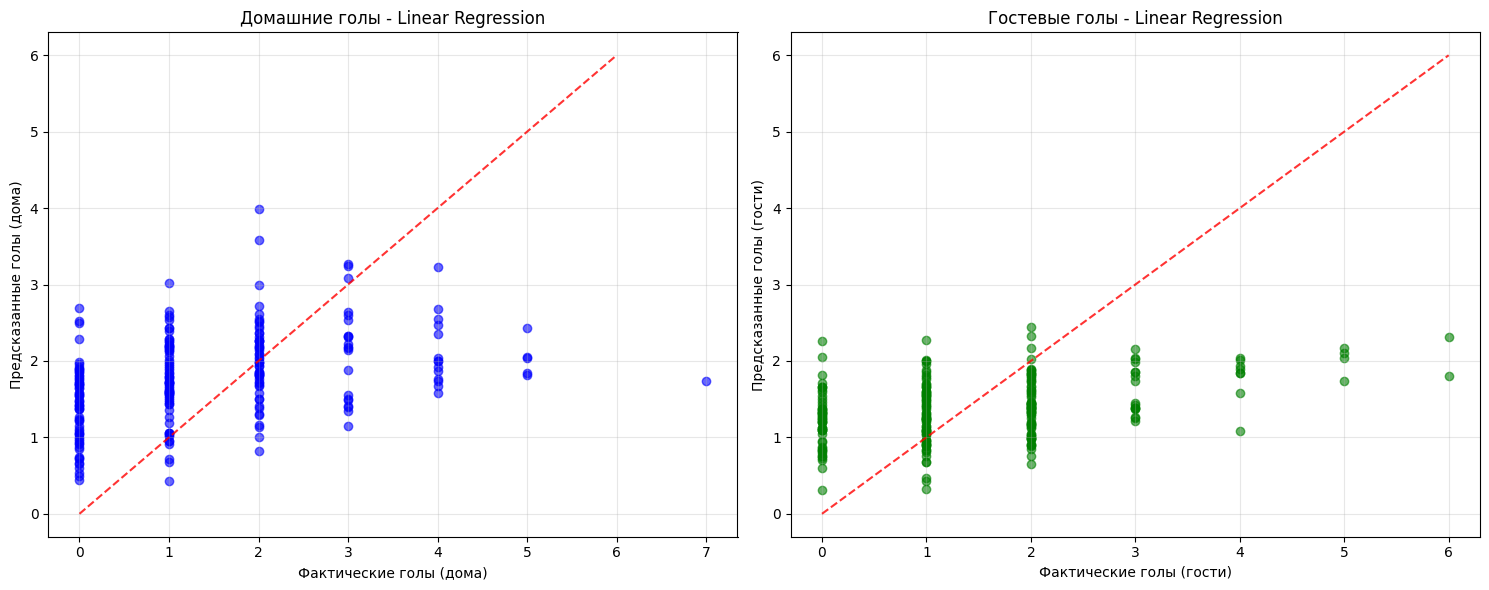

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 1.0141
   Гостевые голы - MAE: 0.8723
   Средний MAE: 0.9432

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.34   | 0.3626🟢   | -0.3

In [ ]:
# Конфигурация 2: 3 сезона, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(3, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    3, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 4 сезонов, PURE
📥 Загружаем 4 сезонов...
✅ Загружено 1520 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 26
Диапазон дат матчей: 2021-08-13 00:00:00 - 2025-05-25 00:00:00


[10/31/25 09:30:44] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=850817;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=386755;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 26/26 [00:40<00:00,  1.56s/it]



✅ Успешно загружено: 26 команд
✅ Создан DataFrame с 11378 записями ELO для 26 команд
✅ Загружено ELO данных: 11378 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 1520 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 1520
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-8.0
✅ Обучающая: (1210, 11), Тестовая: (310, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-7.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Lasso ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Random Forest ---

--- Обучение модели: Gradient Boosting ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural N

[10/31/25 09:32:46] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=539963;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=370418;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=633428;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=848304;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=305286;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=491554;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=109768;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=842320;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=408220;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=729434;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=264415;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=423123;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=888466;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=111665;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=480123;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=352742;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=32685;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=515639;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=656494;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=745585;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Lasso
   Средний R²: 0.1090
   Средний MAE: 0.9322

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 4 сезонов

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.1076 | 0.9341 |   0.5323 |      0.571  |       0.5613 |
| Ridge Regression         | 0.1076 | 0.9341 |   0.5323 |      0.571  |       0.5613 |
| Lasso                    | 0.109  | 0.9322 |   0.5548 |      0.571  |       0.5613 |
| Poisson Regression       | 0.0898 | 0.9396 |   0.5355 |      0.571  |       0.5613 |
| Random Forest            | 0.0964 | 0.9305 |   0.5452 |      0.5613 |       0.5548 |
| Gradient Boosting        | 0.0678 | 0.9482 |   0.5355 |      0.5194 |       0.5645 |
| Neural Network (Micro)   | 0.079

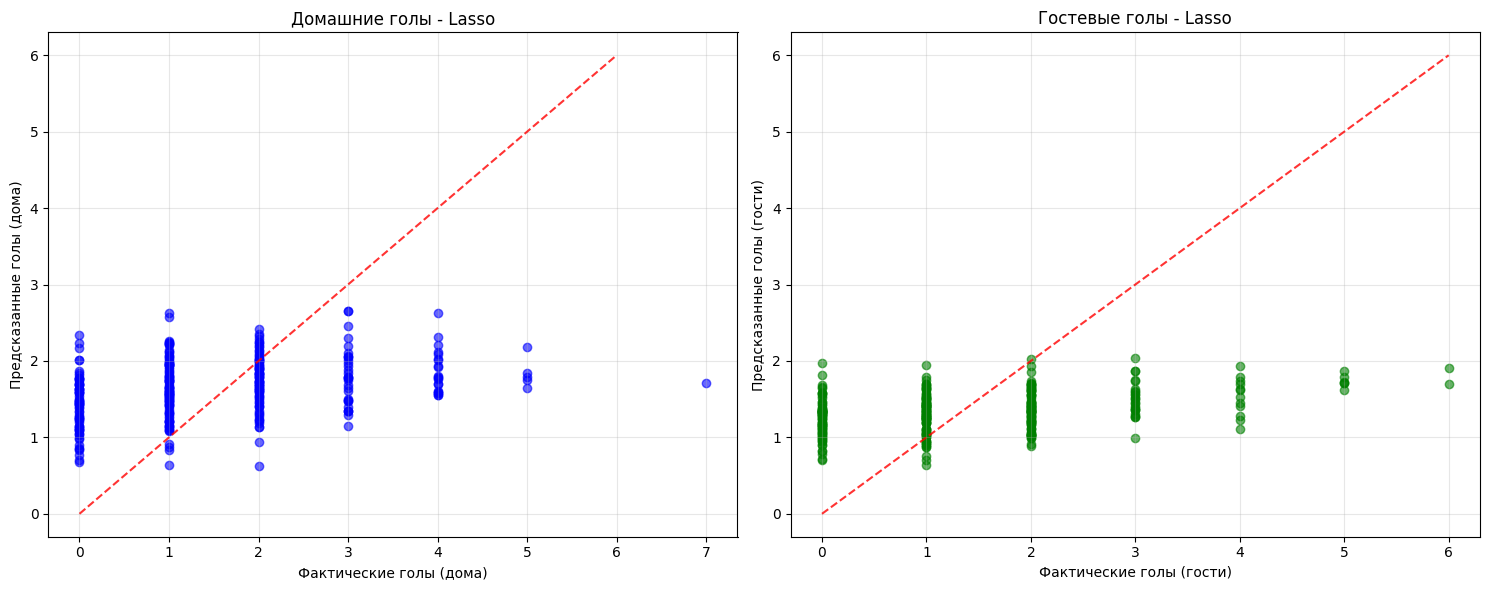

📊 Статистика предсказаний (Lasso):
   Домашние голы - MAE: 0.9624
   Гостевые голы - MAE: 0.9019
   Средний MAE: 0.9322

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.3393 | 0.3542🟢   | -0.3245🔴  |
+---

In [ ]:
# Конфигурация 2: 4 сезона, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(4, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    4, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 5 сезонов, PURE
📥 Загружаем 5 сезонов...
✅ Загружено 1900 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 27
Диапазон дат матчей: 2020-09-12 00:00:00 - 2025-05-25 00:00:00


[10/31/25 09:32:49] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=777092;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=266727;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 27/27 [00:04<00:00,  6.04it/s]



✅ Успешно загружено: 27 команд
✅ Создан DataFrame с 14766 записями ELO для 27 команд
✅ Загружено ELO данных: 14766 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 1900 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 1900
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-8.0
✅ Обучающая: (1520, 11), Тестовая: (380, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-7.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Lasso ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Random Forest ---

--- Обучение модели: Gradient Boosting ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural N

[10/31/25 09:34:19] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=78694;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=53947;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=908603;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=559351;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=485847;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=272265;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=464265;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=170487;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=175167;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=887287;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=903481;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=985109;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=566389;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=940761;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=49315;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=875060;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=944067;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=977123;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=860294;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=212245;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.1164
   Средний MAE: 0.9095

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 5 сезонов

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.1164 | 0.9095 |   0.5421 |      0.5684 |       0.5737 |
| Ridge Regression         | 0.1164 | 0.9095 |   0.5421 |      0.5684 |       0.5737 |
| Lasso                    | 0.1096 | 0.9154 |   0.5684 |      0.5658 |       0.5737 |
| Poisson Regression       | 0.0979 | 0.9183 |   0.5368 |      0.5658 |       0.5737 |
| Random Forest            | 0.1071 | 0.9177 |   0.5579 |      0.5474 |       0.5684 |
| Gradient Boosting        | 0.0434 | 0.9395 |   0.5316 |      0.5632 |       0.5763 |
| Neural Network (Micr

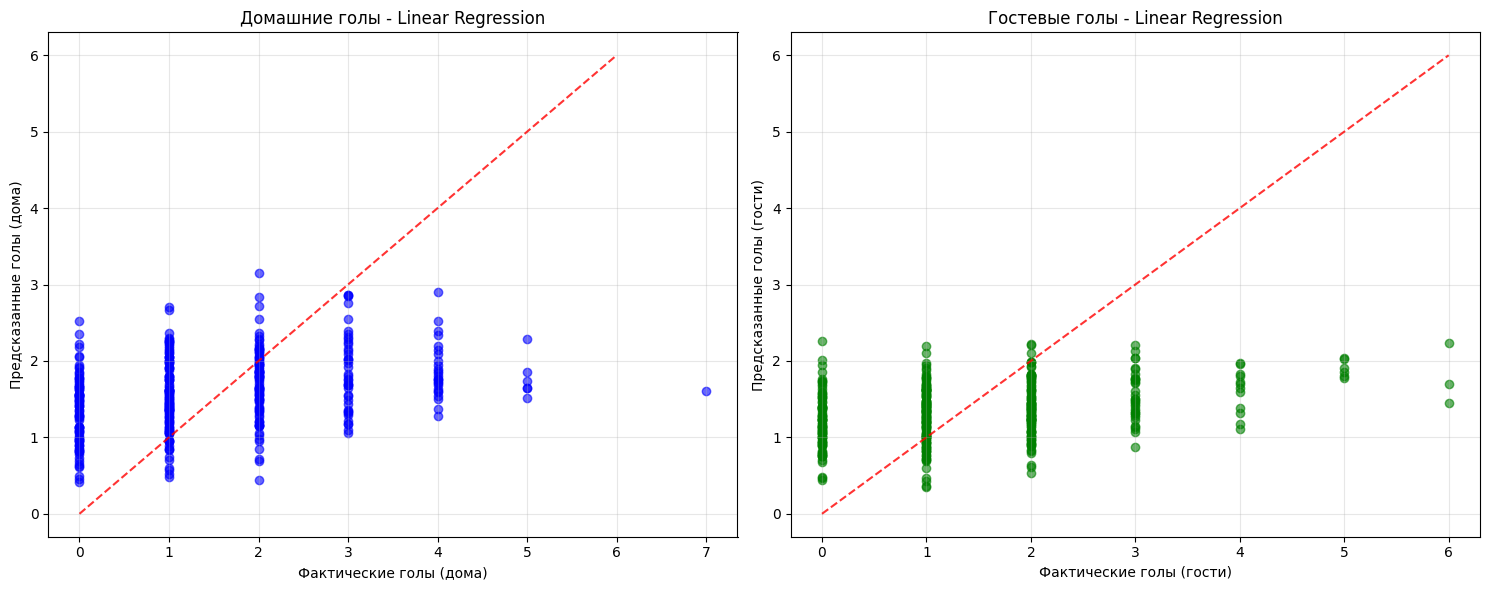

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 0.9476
   Гостевые голы - MAE: 0.8714
   Средний MAE: 0.9095

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.3111 | 0.3253🟢   | -0.2

In [ ]:
# Конфигурация 2: 5 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(5, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    5, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 6 сезонов, PURE
📥 Загружаем 6 сезонов...
✅ Загружено 2280 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 27
Диапазон дат матчей: 2019-08-09 00:00:00 - 2025-05-25 00:00:00


[10/27/25 09:35:55] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=615584;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=730733;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 27/27 [00:00<00:00, 53.83it/s]



✅ Успешно загружено: 27 команд
✅ Создан DataFrame с 17499 записями ELO для 27 команд
✅ Загружено ELO данных: 17499 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 2280 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 2280
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (1823, 11), Тестовая: (457, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-7.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Lasso ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Random Forest ---

--- Обучение модели: Gradient Boosting ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural N

[10/27/25 09:38:13] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=414667;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=157084;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=379363;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=52669;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=739857;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=643558;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=62947;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=142968;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=92738;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=3497;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=926719;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=571162;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=438288;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=733365;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=603496;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=923621;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=809891;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=208114;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=147474;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=300977;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.1292
   Средний MAE: 0.9287

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 6 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.1292 | 0.9287 |   0.5492 |      0.5755 |       0.5646 |
| Ridge Regression         | 0.1292 | 0.9288 |   0.5492 |      0.5755 |       0.5646 |
| Lasso                    | 0.1058 | 0.9428 |   0.5733 |      0.5821 |       0.5733 |
| Poisson Regression       | 0.1079 | 0.9373 |   0.5492 |      0.5821 |       0.5733 |
| Random Forest            | 0.127  | 0.9209 |   0.5624 |      0.5755 |       0.5799 |
| Gradient Boosting        | 0.0623 | 0.9559 |   0.5667 |      0.547  |       0.5711 |
| Neural Network

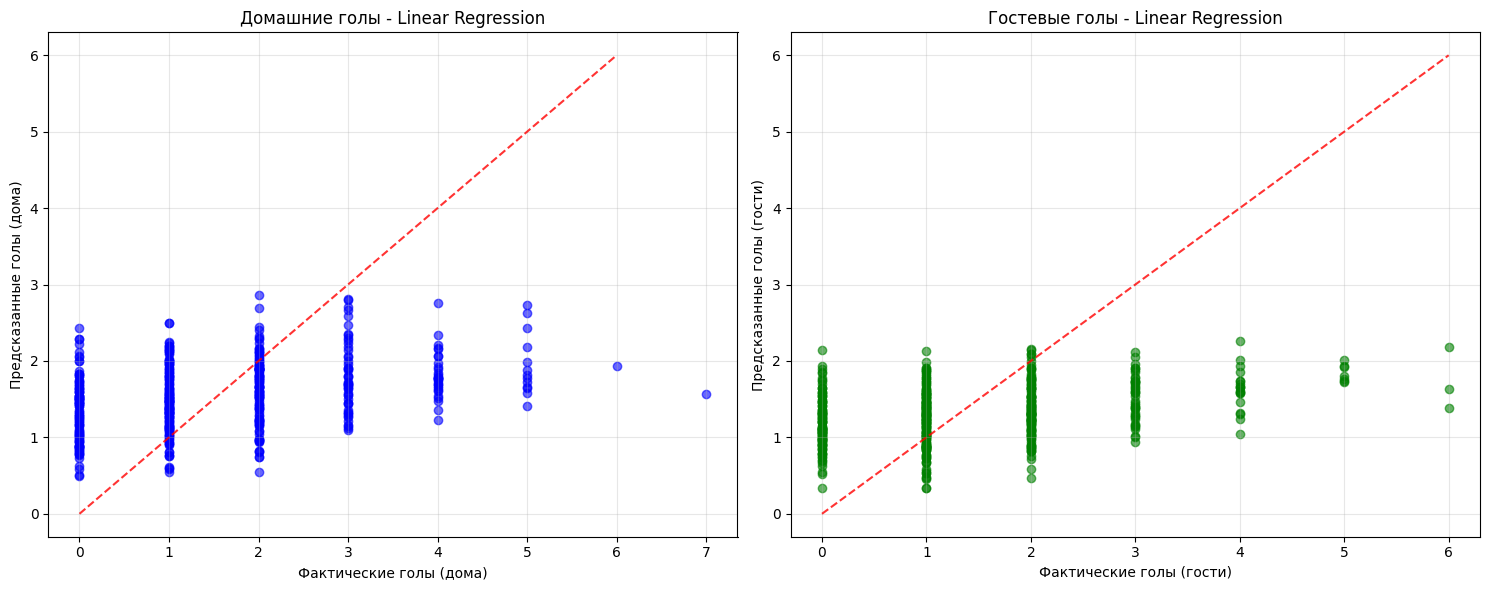

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 0.9709
   Гостевые голы - MAE: 0.8866
   Средний MAE: 0.9287

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.2894 | 0.3001🟢   | -0.2

In [ ]:
# Конфигурация 2: 6 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(6, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    6, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 7 сезонов, PURE
📥 Загружаем 7 сезонов...
✅ Загружено 2660 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 29
Диапазон дат матчей: 2018-08-10 00:00:00 - 2025-05-25 00:00:00


[10/24/25 07:41:35] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=542079;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=803922;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 29/29 [00:04<00:00,  6.77it/s]



✅ Успешно загружено: 29 команд
✅ Создан DataFrame с 21303 записями ELO для 29 команд
✅ Загружено ELO данных: 21303 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 2660 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 2660
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (2128, 11), Тестовая: (532, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-7.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regressio

[10/24/25 07:44:39] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=560303;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=690179;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=419806;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=236282;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=819789;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=226243;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=735308;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=701387;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=223065;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=697380;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=938618;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=720004;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=505440;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=894953;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

[10/24/25 07:44:40] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=995150;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=517787;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=624098;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=792332;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=708422;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=23977;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.1178
   Средний MAE: 0.9360

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 7 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.1178 | 0.936  |   0.5508 |      0.5789 |       0.5827 |
| Ridge Regression         | 0.1178 | 0.9361 |   0.5508 |      0.5789 |       0.5827 |
| Poisson Regression       | 0.1008 | 0.9411 |   0.5508 |      0.5902 |       0.5883 |
| Neural Network (Micro)   | 0.0837 | 0.9347 |   0.5244 |      0.5489 |       0.5902 |
| Neural Network (Shallow) | 0.0863 | 0.9356 |   0.5301 |      0.5602 |       0.5921 |
| Neural Network (Mini)    | 0.0574 | 0.9508 |   0.5244 |      0.532  |       0.5902 |
| Neural Network

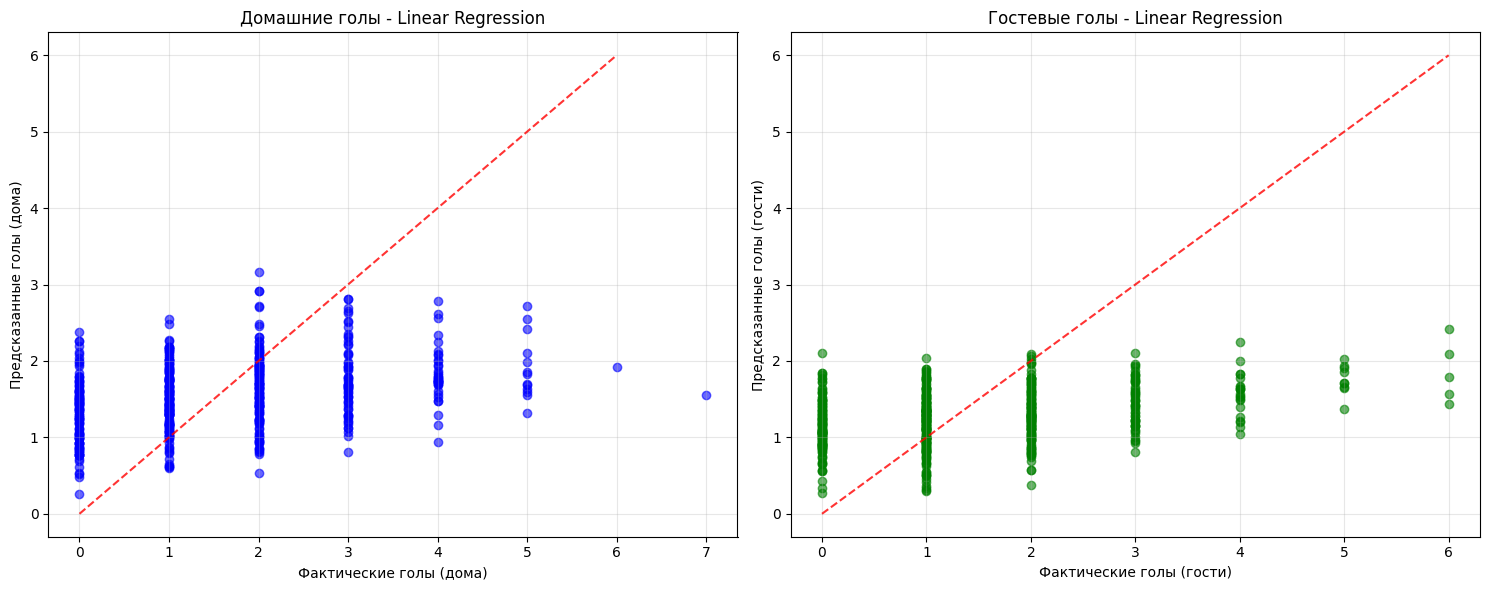

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 0.9685
   Гостевые голы - MAE: 0.9036
   Средний MAE: 0.9360

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.2912 | 0.3028🟢   | -0.2

In [ ]:
# Конфигурация 2: 7 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(7, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    7, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 8 сезонов, PURE
📥 Загружаем 8 сезонов...
✅ Загружено 3040 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 31
Диапазон дат матчей: 2017-08-11 00:00:00 - 2025-05-25 00:00:00


[10/24/25 07:44:43] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=35240;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=710764;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 31/31 [00:06<00:00,  4.79it/s]



✅ Успешно загружено: 31 команд
✅ Создан DataFrame с 25702 записями ELO для 31 команд
✅ Загружено ELO данных: 25702 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 3040 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 3040
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (2430, 11), Тестовая: (610, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-7.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regressio

[10/24/25 07:48:09] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=394255;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=707224;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=399261;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=345511;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=43094;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=427876;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=568334;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=455158;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=477382;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=485164;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=990530;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=160113;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=966592;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=534023;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=212581;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=118606;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=714159;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=191969;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=12950;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=812136;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.0957
   Средний MAE: 0.9509

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 8 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.0957 | 0.9509 |   0.5311 |      0.5852 |       0.5869 |
| Ridge Regression         | 0.0957 | 0.9509 |   0.5311 |      0.5852 |       0.5869 |
| Poisson Regression       | 0.0808 | 0.955  |   0.5377 |      0.5984 |       0.5918 |
| Neural Network (Micro)   | 0.0703 | 0.9555 |   0.5246 |      0.5426 |       0.5918 |
| Neural Network (Shallow) | 0.0669 | 0.9495 |   0.5246 |      0.5787 |       0.5934 |
| Neural Network (Mini)    | 0.0508 | 0.9647 |   0.5262 |      0.559  |       0.5836 |
| Neural Network

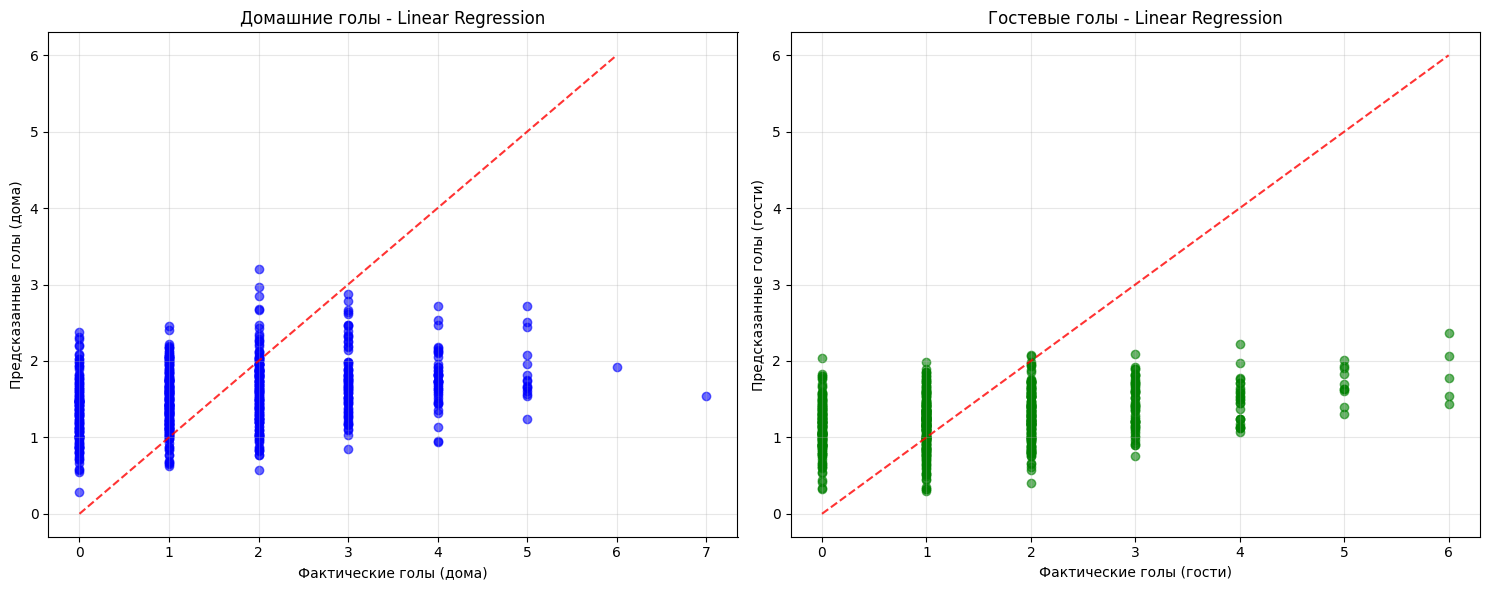

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 0.9850
   Гостевые голы - MAE: 0.9169
   Средний MAE: 0.9509

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.2919 | 0.3030🟢   | -0.2

In [ ]:
# Конфигурация 2: 8 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(8, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    8, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 9 сезонов, PURE
📥 Загружаем 9 сезонов...
✅ Загружено 3420 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 34
Диапазон дат матчей: 2016-08-13 00:00:00 - 2025-05-25 00:00:00


[10/24/25 07:48:13] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=900429;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=843323;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 34/34 [00:06<00:00,  5.51it/s]



✅ Успешно загружено: 34 команд
✅ Создан DataFrame с 30563 записями ELO для 34 команд
✅ Загружено ELO данных: 30563 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 3420 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 3420
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (2736, 11), Тестовая: (684, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-7.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regressio

[10/24/25 07:51:02] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=699303;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=473900;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=598523;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=506960;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=157918;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=318017;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=582906;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=403965;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=645291;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=926053;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=318622;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=614323;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=723179;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=47804;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=941751;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=293226;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=475346;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=459069;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=15649;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=374886;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.0941
   Средний MAE: 0.9505

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 9 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.0941 | 0.9505 |   0.5365 |      0.5892 |       0.5906 |
| Ridge Regression         | 0.0941 | 0.9505 |   0.5365 |      0.5892 |       0.5906 |
| Poisson Regression       | 0.0789 | 0.9536 |   0.5365 |      0.6053 |       0.595  |
| Neural Network (Micro)   | 0.0683 | 0.9595 |   0.5322 |      0.5906 |       0.595  |
| Neural Network (Shallow) | 0.0809 | 0.945  |   0.5351 |      0.5804 |       0.598  |
| Neural Network (Mini)    | 0.0573 | 0.9636 |   0.5073 |      0.5716 |       0.5965 |
| Neural Network

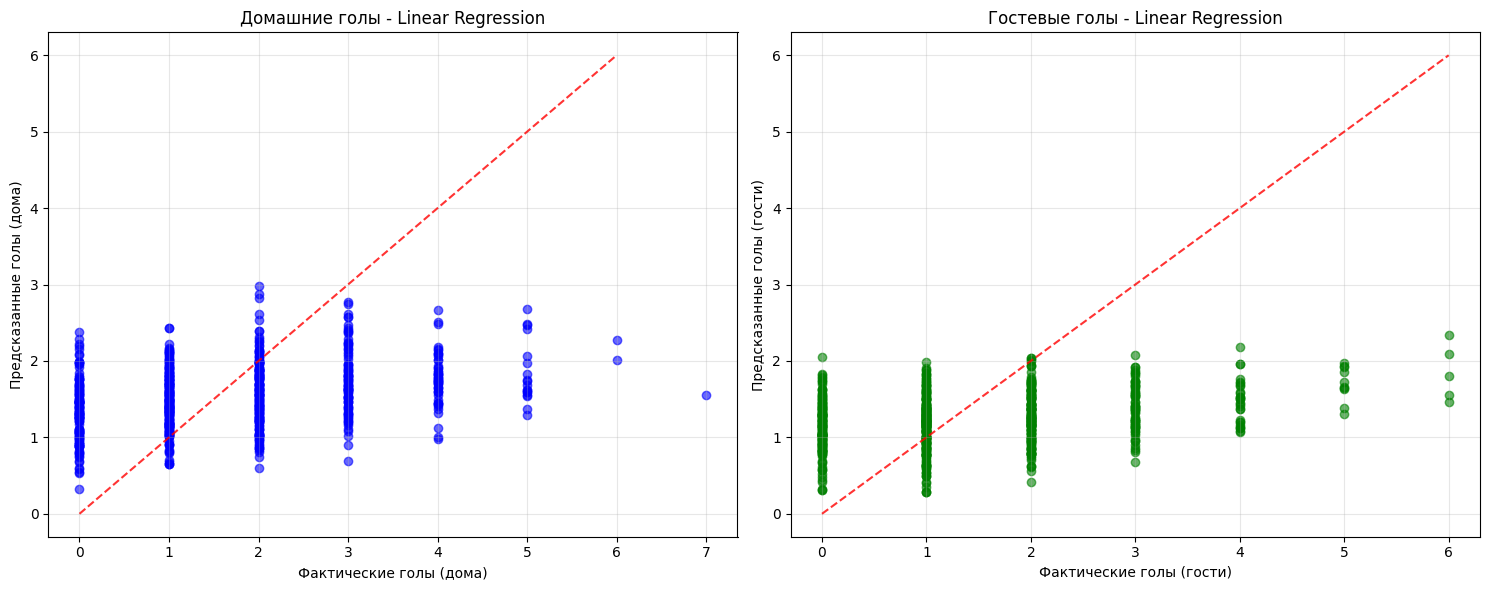

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 0.9899
   Гостевые голы - MAE: 0.9111
   Средний MAE: 0.9505

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.2974 | 0.3038🟢   | -0.2

In [ ]:
# Конфигурация 4: 9 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(9, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    9, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 10 сезонов, PURE
📥 Загружаем 10 сезонов...
✅ Загружено 3800 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 34
Диапазон дат матчей: 2015-08-08 00:00:00 - 2025-05-25 00:00:00


[10/24/25 07:51:07] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=645493;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=613290;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 34/34 [00:00<00:00, 60.46it/s]



✅ Успешно загружено: 34 команд
✅ Создан DataFrame с 33761 записями ELO для 34 команд
✅ Загружено ELO данных: 33761 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 3800 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 3800
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (3040, 11), Тестовая: (760, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-7.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regressio

[10/24/25 07:53:54] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=938785;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=457457;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=564009;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=722597;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=994094;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=289306;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=320272;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=580938;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=427621;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=128363;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=338282;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=396202;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=448782;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=869608;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=465448;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=575911;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=257476;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=171429;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=759015;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=560845;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.0964
   Средний MAE: 0.9469

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 10 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.0964 | 0.9469 |   0.5408 |      0.5947 |       0.5934 |
| Ridge Regression         | 0.0964 | 0.9469 |   0.5408 |      0.5947 |       0.5934 |
| Poisson Regression       | 0.08   | 0.9516 |   0.5421 |      0.6066 |       0.5947 |
| Neural Network (Micro)   | 0.0698 | 0.9506 |   0.5289 |      0.5882 |       0.5947 |
| Neural Network (Shallow) | 0.0825 | 0.9458 |   0.5342 |      0.5763 |       0.5987 |
| Neural Network (Mini)    | 0.056  | 0.9651 |   0.5224 |      0.5618 |       0.5829 |
| Neural Networ

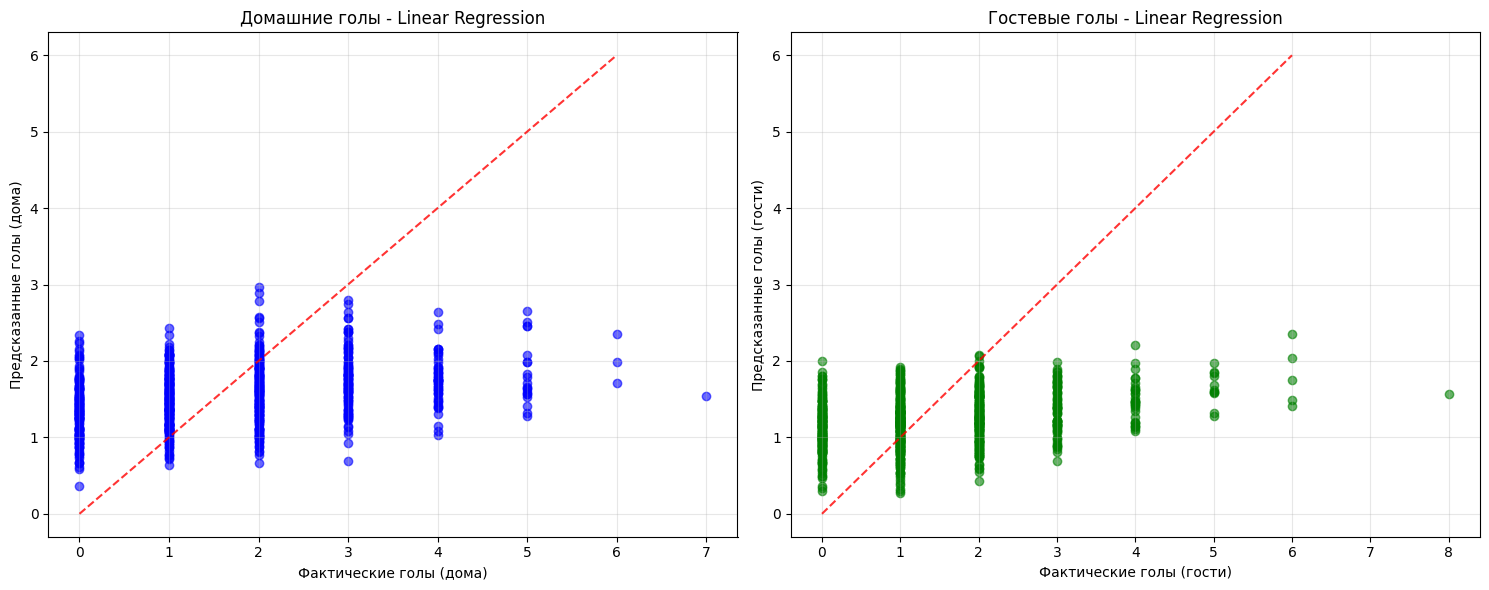

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 0.9871
   Гостевые голы - MAE: 0.9066
   Средний MAE: 0.9469

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.2729 | 0.2805🟢   | -0.2

In [ ]:
# Конфигурация 4: 10 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(10, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    10, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 11 сезонов, PURE
📥 Загружаем 11 сезонов...
✅ Загружено 4180 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 35
Диапазон дат матчей: 2014-08-16 00:00:00 - 2025-05-25 00:00:00


[10/24/25 07:53:57] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=804359;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=521850;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 35/35 [00:03<00:00, 10.10it/s]



✅ Успешно загружено: 35 команд
✅ Создан DataFrame с 37535 записями ELO для 35 команд
✅ Загружено ELO данных: 37535 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 4180 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 4180
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (3343, 11), Тестовая: (837, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-7.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regressio

[10/24/25 07:57:26] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=104595;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=279531;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=549762;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=510450;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=362634;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=621740;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=79630;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=440366;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=296929;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=792214;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=936512;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=209810;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=790263;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=537659;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=943306;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=596119;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=785959;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=850173;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=496145;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=83206;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.0797
   Средний MAE: 0.9587

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 11 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.0797 | 0.9587 |   0.5424 |      0.5914 |       0.5866 |
| Ridge Regression         | 0.0797 | 0.9587 |   0.5424 |      0.5914 |       0.5866 |
| Poisson Regression       | 0.0668 | 0.962  |   0.5448 |      0.6033 |       0.595  |
| Neural Network (Micro)   | 0.064  | 0.9632 |   0.5376 |      0.5663 |       0.595  |
| Neural Network (Shallow) | 0.0593 | 0.9642 |   0.5341 |      0.5783 |       0.5962 |
| Neural Network (Mini)    | 0.0517 | 0.9722 |   0.5352 |      0.5687 |       0.595  |
| Neural Networ

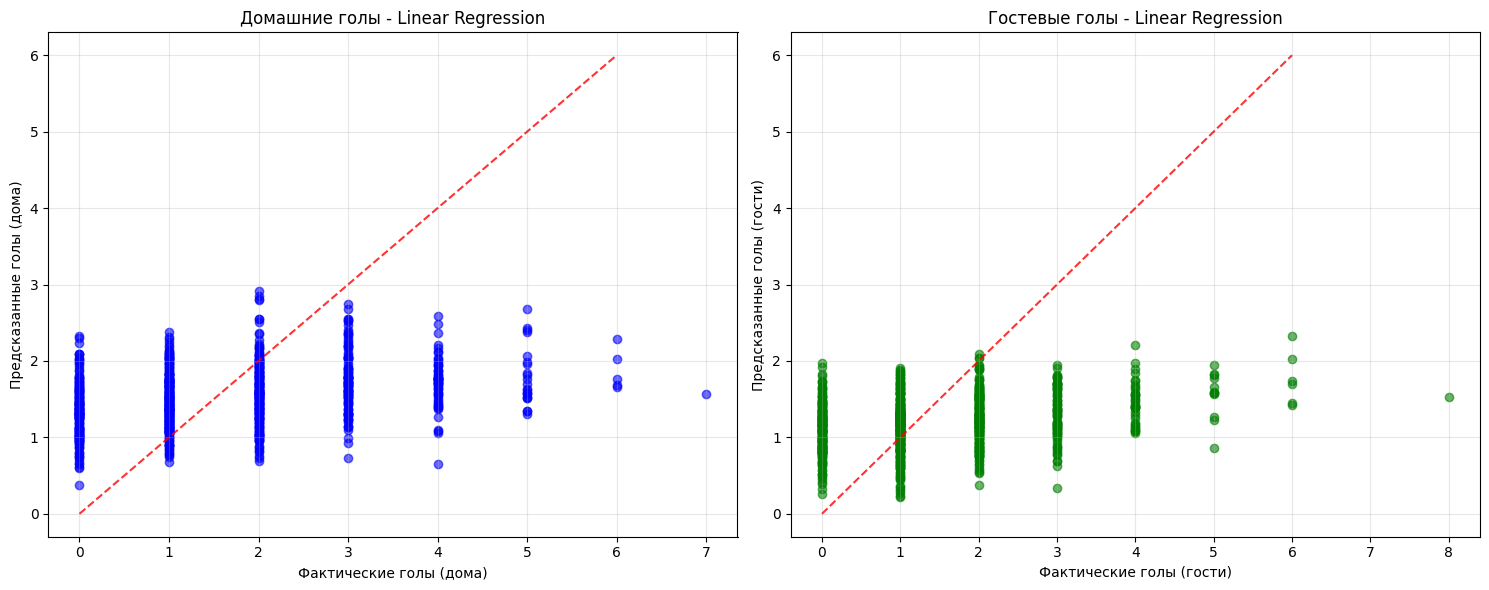

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 0.9985
   Гостевые голы - MAE: 0.9190
   Средний MAE: 0.9587

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.2608 | 0.2634🟢   | -0.2

In [ ]:
# Конфигурация 4: 11 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(11, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    11, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 12 сезонов, PURE
📥 Загружаем 12 сезонов...
✅ Загружено 4560 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 35
Диапазон дат матчей: 2013-08-17 00:00:00 - 2025-05-25 00:00:00


[10/24/25 07:57:30] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=403637;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=812976;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 35/35 [00:00<00:00, 52.60it/s]



✅ Успешно загружено: 35 команд
✅ Создан DataFrame с 40776 записями ELO для 35 команд
✅ Загружено ELO данных: 40776 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 4560 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 4560
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (3641, 11), Тестовая: (919, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-7.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regressio

[10/24/25 08:00:59] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=768279;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=205910;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=532431;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=34438;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=67640;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=613699;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=301815;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=545117;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=585363;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=593582;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=220198;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=232808;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=396939;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=421520;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=879747;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=847603;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=877491;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=611087;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=173291;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=965271;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Ridge Regression
   Средний R²: 0.0837
   Средний MAE: 0.9589

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 12 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.0837 | 0.9589 |   0.5419 |      0.5843 |       0.5767 |
| Ridge Regression         | 0.0837 | 0.9589 |   0.5419 |      0.5843 |       0.5767 |
| Poisson Regression       | 0.072  | 0.9607 |   0.5473 |      0.593  |       0.5832 |
| Neural Network (Micro)   | 0.0691 | 0.9581 |   0.5528 |      0.5843 |       0.5843 |
| Neural Network (Shallow) | 0.0703 | 0.959  |   0.5408 |      0.5811 |       0.5854 |
| Neural Network (Mini)    | 0.0575 | 0.9717 |   0.5321 |      0.5473 |       0.5734 |
| Neural Network

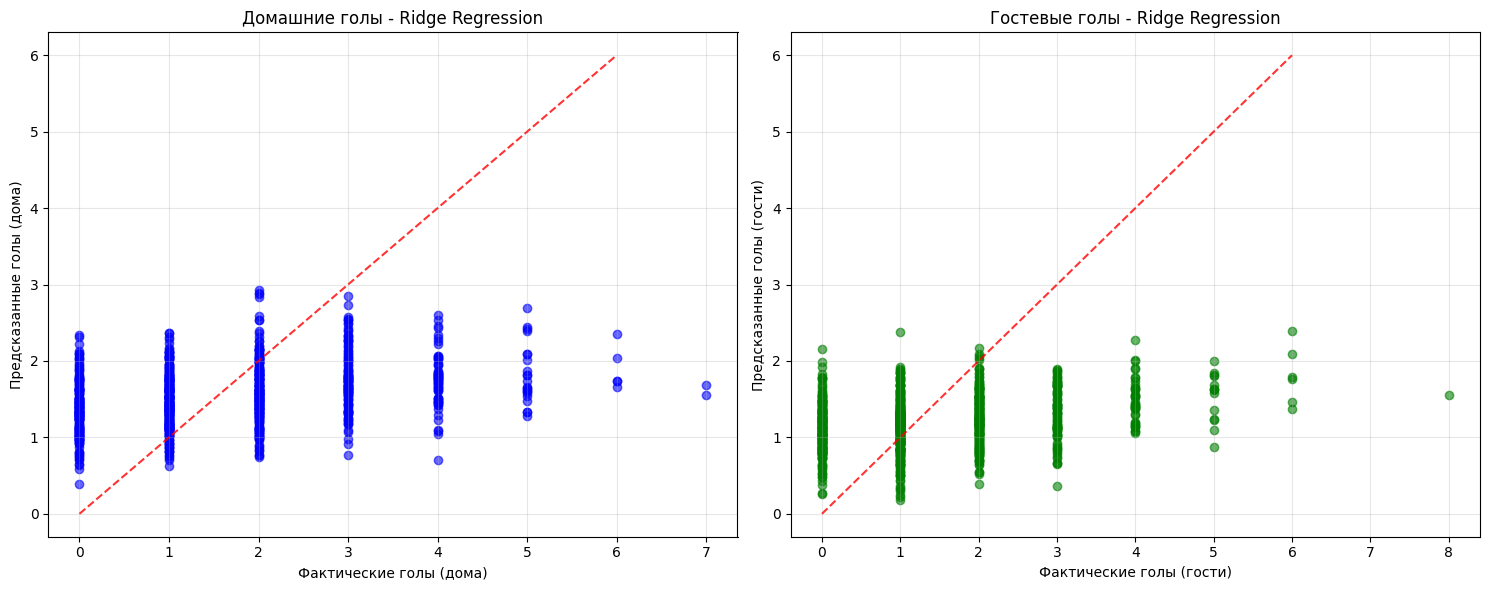

📊 Статистика предсказаний (Ridge Regression):
   Домашние голы - MAE: 0.9915
   Гостевые голы - MAE: 0.9264
   Средний MAE: 0.9589

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.259  | 0.2611🟢   | -0.25

In [ ]:
# Конфигурация 4: 12 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(12, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    12, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 15 сезонов, PURE
📥 Загружаем 15 сезонов...
✅ Загружено 5700 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 41
Диапазон дат матчей: 2010-08-14 00:00:00 - 2025-05-25 00:00:00


[10/24/25 08:01:03] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=417511;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=651001;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]



✅ Успешно загружено: 41 команд
✅ Создан DataFrame с 55136 записями ELO для 41 команд
✅ Загружено ELO данных: 55136 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 5700 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 5700
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (4560, 11), Тестовая: (1140, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-9.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regressi

[10/24/25 08:05:11] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=660389;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=944176;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=203980;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=257075;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=449604;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=306936;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=208282;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=790405;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=975381;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=638219;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=201741;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=51088;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=144746;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=12008;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=302077;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=517309;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=937639;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=763622;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=246476;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=22032;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.0874
   Средний MAE: 0.9597

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 15 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.0874 | 0.9597 |   0.5404 |      0.5781 |       0.5649 |
| Ridge Regression         | 0.0874 | 0.9597 |   0.5404 |      0.5781 |       0.5649 |
| Poisson Regression       | 0.0745 | 0.9628 |   0.536  |      0.5789 |       0.5684 |
| Neural Network (Micro)   | 0.0708 | 0.9665 |   0.5289 |      0.5711 |       0.5702 |
| Neural Network (Shallow) | 0.0773 | 0.9617 |   0.5228 |      0.5737 |       0.5675 |
| Neural Network (Mini)    | 0.0681 | 0.967  |   0.5404 |      0.5482 |       0.5649 |
| Neural Networ

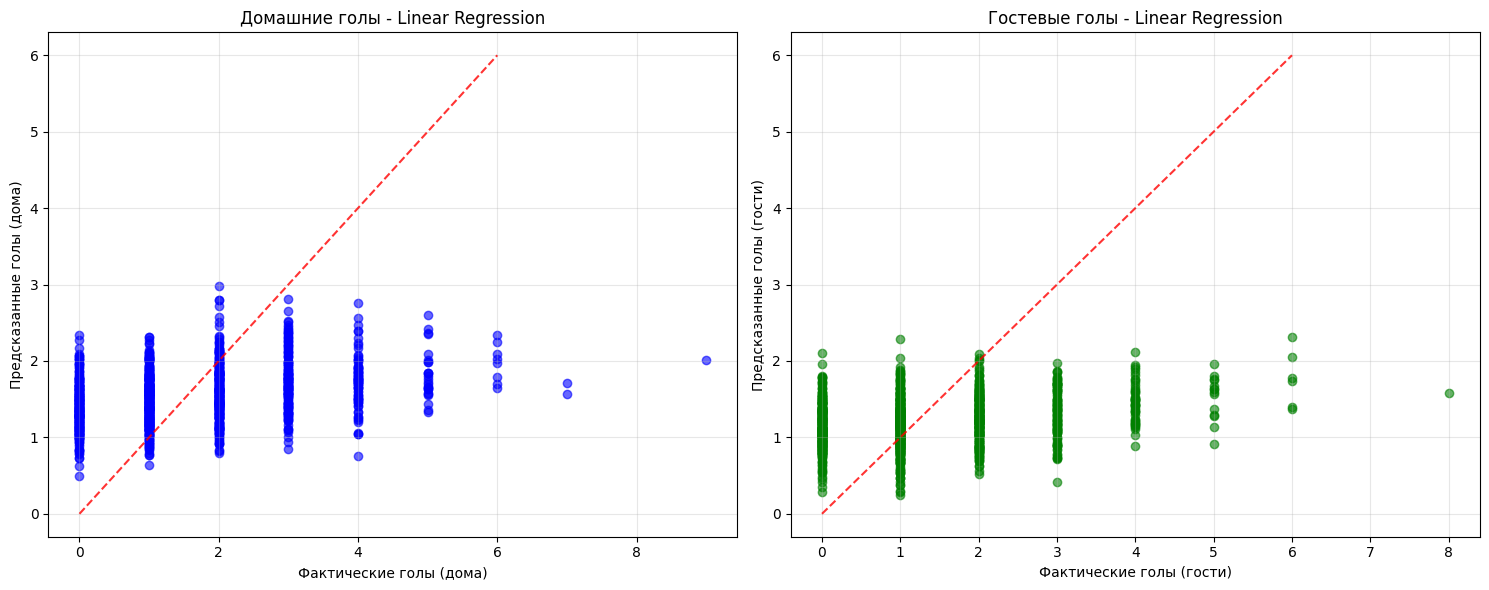

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 1.0046
   Гостевые голы - MAE: 0.9147
   Средний MAE: 0.9597

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.2489 | 0.2526🟢   | -0.2

In [ ]:
# Конфигурация 6: 15 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(15, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    15, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 18 сезонов, PURE
📥 Загружаем 18 сезонов...
✅ Загружено 6840 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 43
Диапазон дат матчей: 2007-08-11 00:00:00 - 2025-05-25 00:00:00


[10/24/25 08:05:15] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=178465;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=516195;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 43/43 [00:06<00:00,  6.34it/s]



✅ Успешно загружено: 43 команд
✅ Создан DataFrame с 66915 записями ELO для 43 команд
✅ Загружено ELO данных: 66915 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 6840 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 6840
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (5470, 11), Тестовая: (1370, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-9.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regressi

[10/24/25 08:10:32] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=998971;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=318594;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=515522;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=314157;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=152200;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=908262;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=981795;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=620508;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=750728;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=417246;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=611978;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=696636;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=643919;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=390583;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=797240;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=225483;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=163002;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=208527;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=659505;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=589266;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.0942
   Средний MAE: 0.9574

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 18 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.0942 | 0.9574 |   0.5431 |      0.5766 |       0.5511 |
| Ridge Regression         | 0.0942 | 0.9574 |   0.5431 |      0.5766 |       0.5511 |
| Poisson Regression       | 0.0799 | 0.9613 |   0.5394 |      0.5737 |       0.5555 |
| Neural Network (Micro)   | 0.0821 | 0.9615 |   0.5321 |      0.5613 |       0.5562 |
| Neural Network (Shallow) | 0.0904 | 0.9574 |   0.5409 |      0.5562 |       0.5555 |
| Neural Network (Mini)    | 0.0812 | 0.9599 |   0.5401 |      0.5628 |       0.5569 |
| Neural Networ

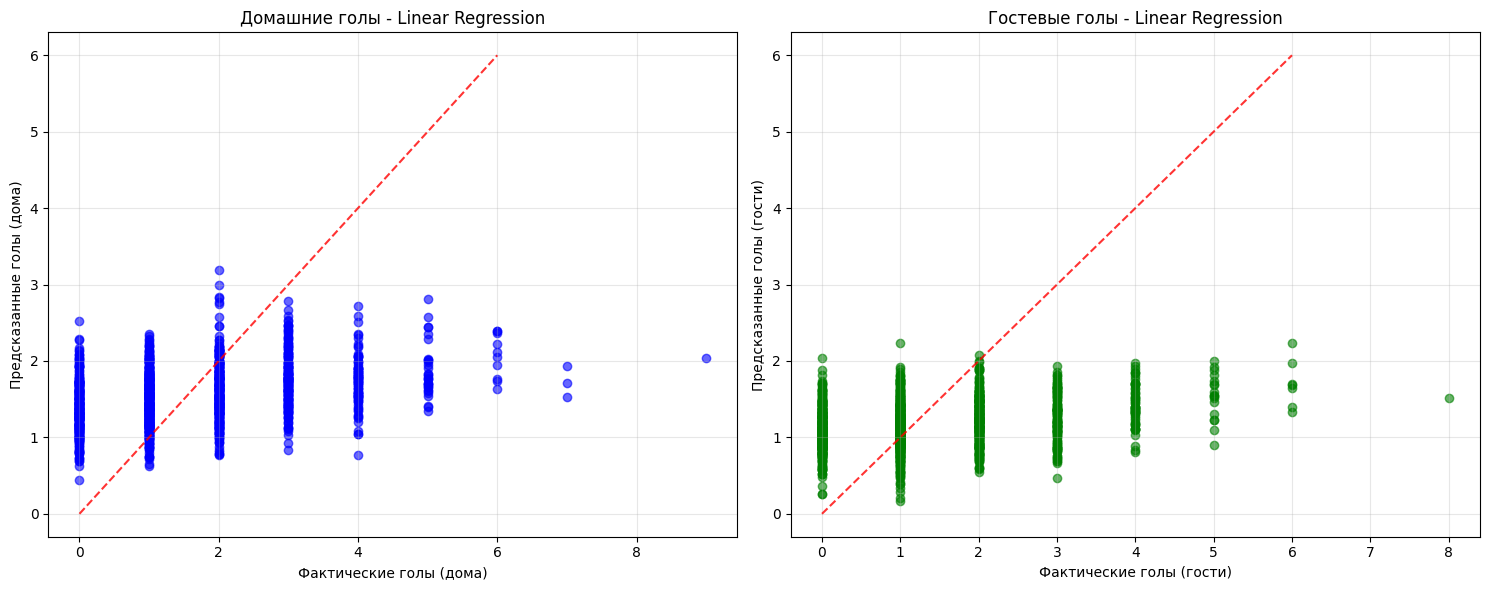

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 0.9946
   Гостевые голы - MAE: 0.9203
   Средний MAE: 0.9574

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.2544 | 0.2649🟢   | -0.2

In [ ]:
# Конфигурация 4: 18 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(18, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    18, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 20 сезонов, PURE
📥 Загружаем 20 сезонов...
✅ Загружено 7600 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 44
Диапазон дат матчей: 2005-08-13 00:00:00 - 2025-05-25 00:00:00


[10/24/25 08:10:36] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=193735;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=704249;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 44/44 [00:02<00:00, 15.53it/s]



✅ Успешно загружено: 44 команд
✅ Создан DataFrame с 75007 записями ELO для 44 команд
✅ Загружено ELO данных: 75007 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 7600 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 7600
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (6080, 11), Тестовая: (1520, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-9.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regressi

[10/24/25 08:15:47] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=182857;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=665141;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=407021;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=131417;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=373720;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=885960;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=52419;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=188567;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=888409;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=227416;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=332194;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=959376;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=435010;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=795577;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=408841;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=563450;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=82088;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=1125;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=138970;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=607128;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.0941
   Средний MAE: 0.9531

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 20 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.0941 | 0.9531 |   0.5395 |      0.5711 |       0.55   |
| Ridge Regression         | 0.0941 | 0.9531 |   0.5395 |      0.5711 |       0.55   |
| Poisson Regression       | 0.0782 | 0.958  |   0.5309 |      0.5763 |       0.5513 |
| Neural Network (Micro)   | 0.08   | 0.9544 |   0.5368 |      0.5691 |       0.5526 |
| Neural Network (Shallow) | 0.0871 | 0.9534 |   0.5329 |      0.5697 |       0.5513 |
| Neural Network (Mini)    | 0.0853 | 0.9598 |   0.5329 |      0.5395 |       0.5513 |
| Neural Networ

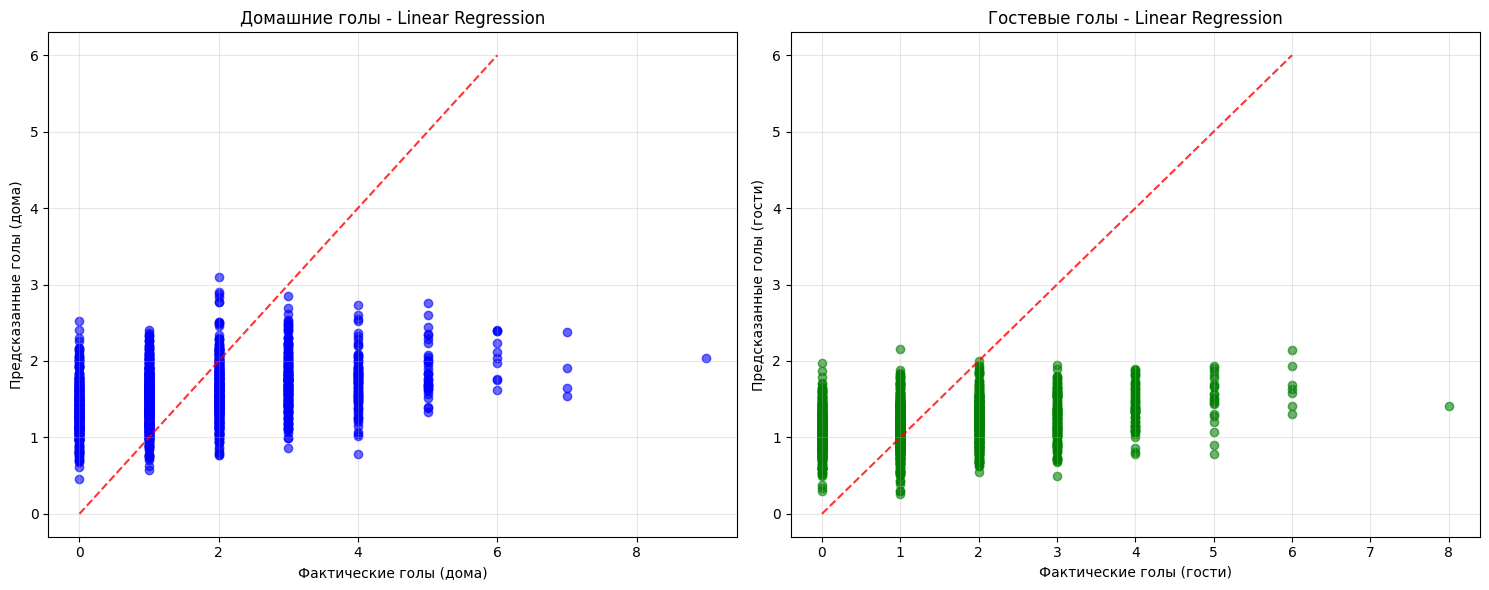

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 0.9940
   Гостевые голы - MAE: 0.9122
   Средний MAE: 0.9531

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.2458 | 0.2564🟢   | -0.2

In [ ]:
# Конфигурация 8: 20 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(20, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    20, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 30 сезонов, PURE
📥 Загружаем 30 сезонов...
✅ Загружено 11310 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 49
Диапазон дат матчей: 1995-08-19 00:00:00 - 2025-05-25 00:00:00


[10/24/25 08:51:16] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=518240;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=952181;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 49/49 [00:00<00:00, 60.36it/s]



✅ Успешно загружено: 49 команд
✅ Создан DataFrame с 111922 записями ELO для 49 команд
✅ Загружено ELO данных: 111922 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 11310 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 11310
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (9047, 11), Тестовая: (2263, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-9.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regr

[10/24/25 09:00:06] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=308744;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=462808;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=110632;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=946434;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=100509;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=358410;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=538440;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=24183;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=447728;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=829656;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=431730;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=896605;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=453723;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=963877;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

[10/24/25 09:00:07] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=118822;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=834324;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=813884;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=792226;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=469515;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=801712;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.0830
   Средний MAE: 0.9487

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 30 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.083  | 0.9487 |   0.5197 |      0.5502 |       0.5334 |
| Ridge Regression         | 0.083  | 0.9487 |   0.5197 |      0.5502 |       0.5334 |
| Poisson Regression       | 0.0676 | 0.9547 |   0.5046 |      0.551  |       0.5342 |
| Neural Network (Micro)   | 0.0744 | 0.9476 |   0.5201 |      0.5475 |       0.5342 |
| Neural Network (Shallow) | 0.0829 | 0.947  |   0.525  |      0.5453 |       0.5342 |
| Neural Network (Mini)    | 0.0694 | 0.9575 |   0.5179 |      0.5404 |       0.5342 |
| Neural Networ

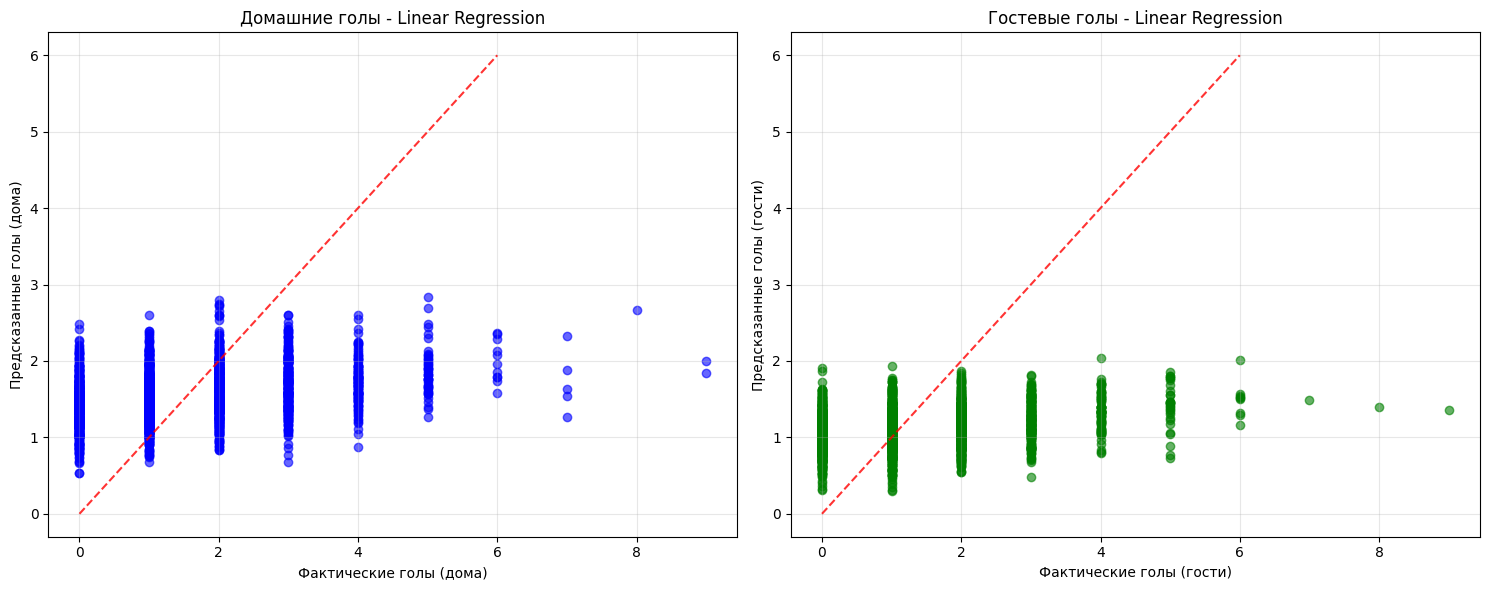

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 0.9882
   Гостевые голы - MAE: 0.9093
   Средний MAE: 0.9487

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.2243 | 0.2345🟢   | -0.2

In [ ]:
# Конфигурация 8: 30 сезонов, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(30, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    30, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)


🎯 ЗАПУСК АНАЛИЗА ДЛЯ ОДНОЙ КОНФИГУРАЦИИ

🔧 КОНФИГУРАЦИЯ: 32 сезонов, PURE
📥 Загружаем 32 сезонов...
✅ Загружено 12234 матчей
📊 Загружаем ELO рейтинги...
Найдено уникальных команд: 51
Диапазон дат матчей: 1993-08-14 00:00:00 - 2025-05-25 00:00:00


[10/24/25 09:00:12] INFO     Saving cached data to /root/soccerdata/data/ClubElo                     ]8;id=654596;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=141332;file:///usr/local/lib/python3.12/dist-packages/soccerdata/_common.py#263\263]8;;\

Загрузка ELO: 100%|██████████| 51/51 [00:00<00:00, 63.66it/s]



✅ Успешно загружено: 51 команд
✅ Создан DataFrame с 118614 записями ELO для 51 команд
✅ Загружено ELO данных: 118614 записей
🔄 Создаем признаки...
📊 Добавляем ELO домашних команд...
📊 Добавляем ELO гостевых команд...
✅ Создано 12234 матчей с 12 признаками
🔧 Подготавливаем данные...
   Признаков: 11, матчей: 12234
   Диапазон голов домашней: 0.0-9.0
   Диапазон голов гостевой: 0.0-9.0
✅ Обучающая: (9784, 11), Тестовая: (2450, 11)
✅ Диапазон голов в обучающей: 0.0-9.0
✅ Диапазон голов в тестовой: 0.0-9.0
🤖 Обучаем модели...

--- Обучение модели: Linear Regression ---

--- Обучение модели: Ridge Regression ---

--- Обучение модели: Poisson Regression ---

--- Обучение модели: Neural Network (Micro) ---

--- Обучение модели: Neural Network (Shallow) ---

--- Обучение модели: Neural Network (Mini) ---

--- Обучение модели: Neural Network (Simple) ---

--- Обучение модели: Neural Network (Light) ---

💾 Сохраняем модели...
   ✅ Scaler сохранен
   ✅ Linear Regression сохранена
   ✅ Ridge Regr

[10/24/25 09:09:49] WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=235449;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=586465;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=572263;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=731132;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Micro) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=964711;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=424422;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=664021;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=933715;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Shallow) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=56248;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=697449;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=612379;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=855151;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Mini) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=938728;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=396471;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=174479;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=463354;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Simple) (нейросеть) сохранена


                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=413796;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=83901;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

                    WARNING  You are saving your model as an HDF5 file via `model.save()` or       ]8;id=380257;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py\saving_api.py]8;;\:]8;id=199984;file:///usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py#83\83]8;;\
                             `keras.saving.save_model(model)`. This file format is considered                      
                             legacy. We recommend using instead the native Keras format, e.g.                      
                             `model.save('my_model.keras')` or `keras.saving.save_model(model,                     
                             'my_model.keras')`.                                                                   

   ✅ Neural Network (Light) (нейросеть) сохранена

🏆 ЛУЧШАЯ МОДЕЛЬ: Linear Regression
   Средний R²: 0.0844
   Средний MAE: 0.9474

📊 РЕЗУЛЬТАТЫ ДЛЯ КОНФИГУРАЦИИ: 32 сезонов, PURE

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
+--------------------------+--------+--------+----------+-------------+--------------+
| Модель                   |     R² |    MAE |   Исходы |   Тотал>2.5 |   Обе забьют |
|--------------------------+--------+--------+----------+-------------+--------------|
| Linear Regression        | 0.0844 | 0.9474 |   0.5237 |      0.5478 |       0.5294 |
| Ridge Regression         | 0.0844 | 0.9474 |   0.5237 |      0.5478 |       0.5294 |
| Poisson Regression       | 0.0692 | 0.9535 |   0.511  |      0.5469 |       0.5306 |
| Neural Network (Micro)   | 0.0745 | 0.948  |   0.5159 |      0.5412 |       0.5306 |
| Neural Network (Shallow) | 0.0807 | 0.9454 |   0.5237 |      0.5367 |       0.5322 |
| Neural Network (Mini)    | 0.0714 | 0.9501 |   0.5327 |      0.5216 |       0.5331 |
| Neural Networ

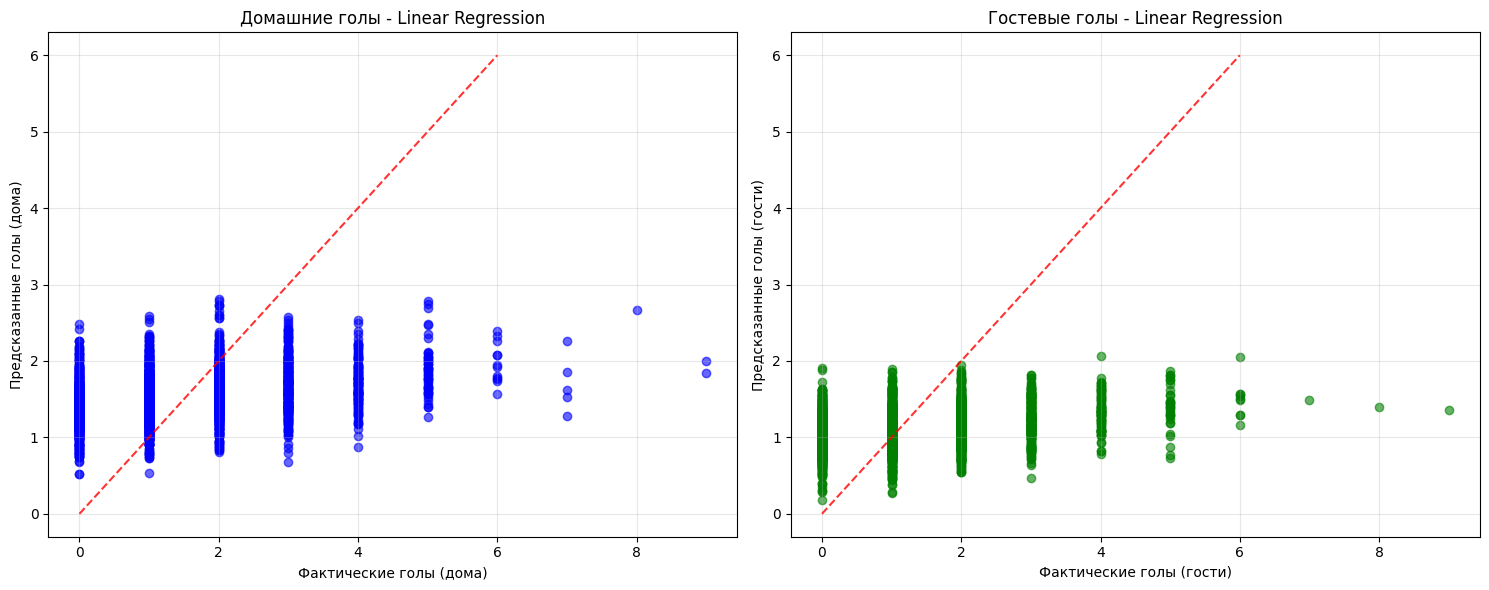

📊 Статистика предсказаний (Linear Regression):
   Домашние голы - MAE: 0.9847
   Гостевые голы - MAE: 0.9101
   Средний MAE: 0.9474

🔍 АНАЛИЗ КОРРЕЛЯЦИИ ПРИЗНАКОВ:
   📊 ELO признаки в анализе: ELO_Difference

🔗 КОРРЕЛЯЦИЯ ПРИЗНАКОВ (ТОЛЬКО ТЕ, ЧТО ИСПОЛЬЗОВАЛИСЬ В МОДЕЛЯХ)
📊 Анализируется 11 признаков, использованных в моделях:
    1. Home_Form_Goals_For
    2. Home_Form_Goals_Against
    3. Away_Form_Goals_For
    4. Away_Form_Goals_Against
    5. H2H_Home_Avg
    6. H2H_Away_Avg
    7. ELO_Difference
    8. Home_Advantage
    9. Away_Disadvantage
   10. Form_Difference
   11. Goal_Difference_Ratio

🎯 ТОП-10 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С РЕЗУЛЬТАТОМ
--------------------------------------------------
+-----+-------------------------+---------------+------------+------------+
|   # | Признак                 |   Ср.важность | Домашние   | Гостевые   |
+=====+=========================+===============+============+============+
|   1 | ELO_Difference          |        0.2149 | 0.2239🟢   | -0.2

In [ ]:
# Конфигурация 2: 32 сезона, без статистики матчей
results_df, predictions, features_df, feature_names, best_model_name, X_test, y_test_home, y_test_away = run_full_analysis(32, False)
corr_matrix_1, config_name_1 = display_configuration_results(
    results_df, predictions, features_df, feature_names, best_model_name,
    32, False
)

# Сравнение нейронных сетей
compare_neural_network_performance(results_df)

In [ ]:
# Основное сравнение
comparison_results = compare_all_configurations()

# Детальный анализ всех моделей
models_analysis = analyze_all_models_performance()

❌ Нет данных для сравнения. Сначала запустите несколько конфигураций.

🔍 АНАЛИЗ ВСЕХ МОДЕЛЕЙ ИЗ ВСЕХ КОНФИГУРАЦИЙ (СРЕДНИЕ ПО СЕЗОНАМ)
❌ Нет данных для анализа



🏴󠁧󠁢󠁥󠁮󠁧󠁿 СИМУЛЯЦИЯ СЕЗОНА АПЛ: 2024-25
📊 Найдено матчей сезона 2024-25: 380
🔮 Получено предсказаний для симуляции: 380
⚽ Симулируем матчи сезона 2024-25...

🏆 ТАБЛИЦА АПЛ СЕЗОНА 2024-25 (СИМУЛЯЦИЯ)
🤖 Модель: Linear Regression
--------------------------------------------------------------------------------
+-------+----------------+-----+-----+-----+-----+------+------+------+-----+
|   Поз | Команда        |   И |   В |   Н |   П |   ГЗ |   ГП |   РГ |   О |
+=======+================+=====+=====+=====+=====+======+======+======+=====+
|     1 | Liverpool      |  38 |  28 |   7 |   3 |   67 |   39 |   28 |  91 |
+-------+----------------+-----+-----+-----+-----+------+------+------+-----+
|     2 | Man City       |  38 |  24 |  12 |   2 |   63 |   40 |   23 |  84 |
+-------+----------------+-----+-----+-----+-----+------+------+------+-----+
|     3 | Arsenal        |  38 |  23 |  12 |   3 |   61 |   40 |   21 |  81 |
+-------+----------------+-----+-----+-----+-----+------+------+-----

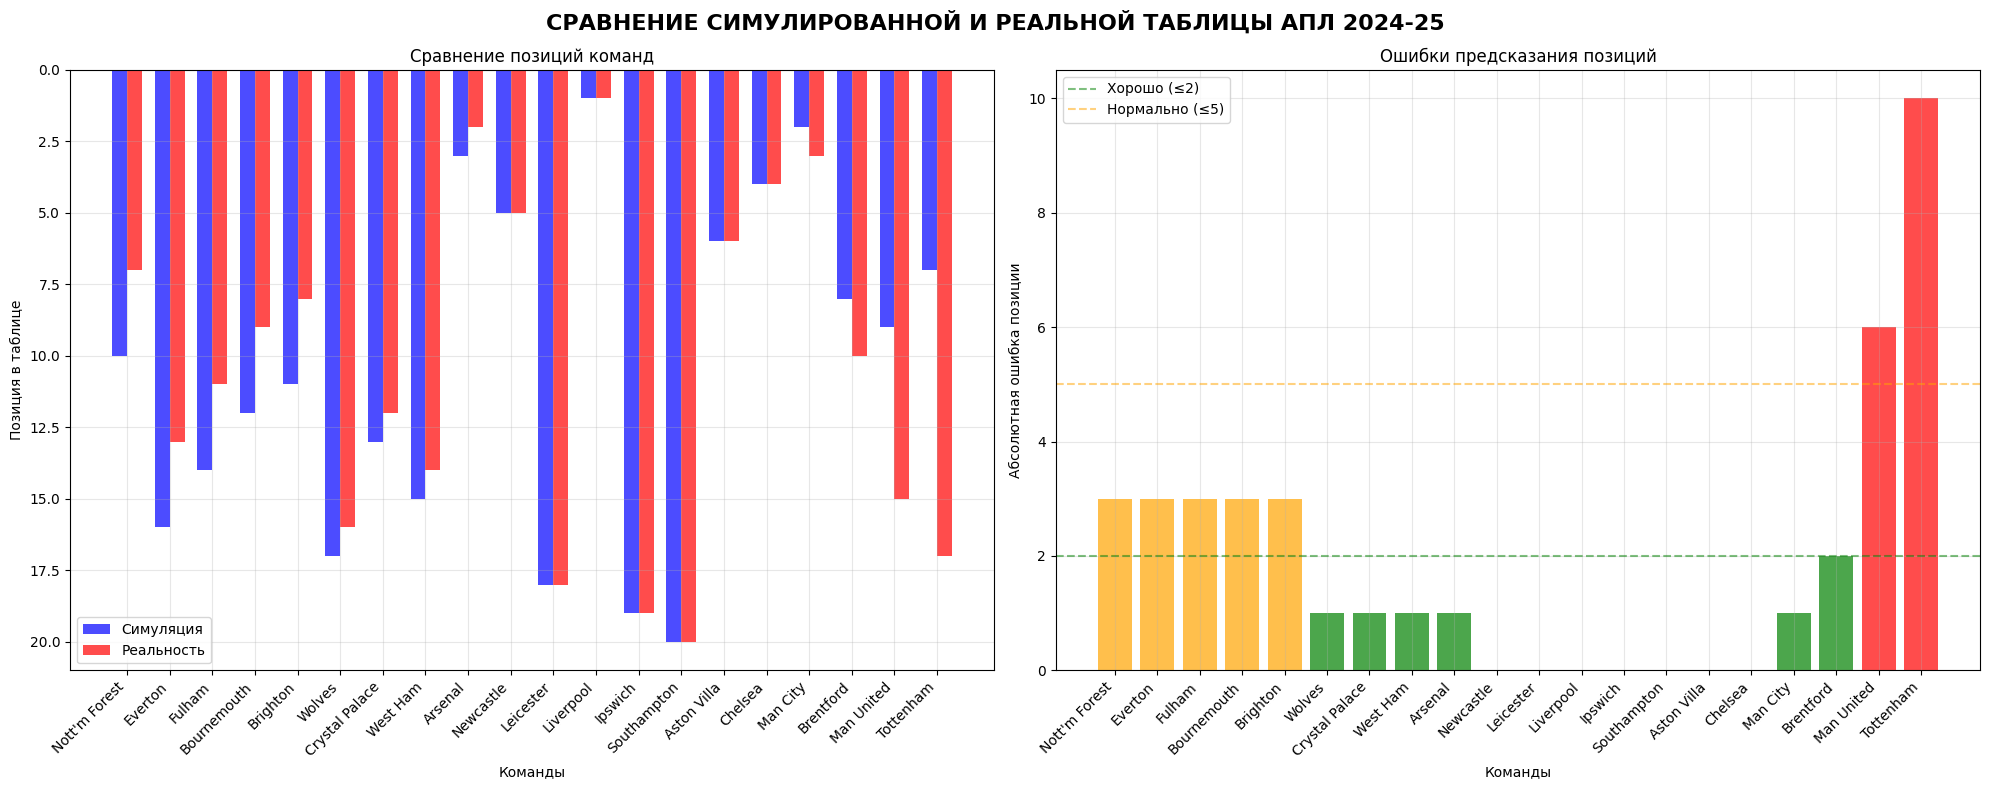

{'simulated_table':            Команда   И   В   Н   П  ГЗ  ГП  РГ   О  Поз
 0        Liverpool  38  28   7   3  67  39  28  91    1
 1         Man City  38  24  12   2  63  40  23  84    2
 2          Arsenal  38  23  12   3  61  40  21  81    3
 3          Chelsea  38  19  13   6  57  44  13  70    4
 4        Newcastle  38  16  16   6  54  44  10  64    5
 5      Aston Villa  38  16  13   9  54  47   7  61    6
 6        Tottenham  38  13  15  10  51  48   3  54    7
 7        Brentford  38  14  12  12  52  50   2  54    8
 8       Man United  38  12  16  10  50  48   2  52    9
 9    Nott'm Forest  38  12  13  13  50  51  -1  49   10
 10        Brighton  38  11  14  13  49  51  -2  47   11
 11     Bournemouth  38  11  14  13  49  51  -2  47   12
 12  Crystal Palace  38   9  17  12  47  50  -3  44   13
 13          Fulham  38   9  14  15  47  53  -6  41   14
 14        West Ham  38   8  16  14  46  52  -6  40   15
 15         Everton  38   8  14  16  46  54  -8  38   16
 16         

In [ ]:
def simulate_premier_league_season(results_df, predictions, features_df, best_model_name, target_season):
    """
    Симулирует сезон АПЛ на основе предсказаний лучшей модели
    """
    print(f"\n{'='*80}")
    print(f"🏴󠁧󠁢󠁥󠁮󠁧󠁿 СИМУЛЯЦИЯ СЕЗОНА АПЛ: {target_season}")
    print(f"{'='*80}")

    # 1. Находим тестовые данные для целевого сезона
    dates = features_df['Date'].sort_values()
    split_idx = int(len(dates) * 0.8)
    split_date = dates.iloc[split_idx]

    # Фильтруем матчи целевого сезона в тестовой выборке
    season_matches = features_df[
        (features_df['season'] == target_season) &
        (features_df['Date'] >= split_date)
    ].copy()

    if season_matches.empty:
        print(f"❌ Нет данных для сезона {target_season} в тестовой выборке")
        print(f"   Доступные сезоны в тестовой выборке: {features_df[features_df['Date'] >= split_date]['season'].unique()}")
        return None

    print(f"📊 Найдено матчей сезона {target_season}: {len(season_matches)}")

    # 2. Получаем предсказания для этих матчей
    pred_home = predictions['home'][best_model_name]
    pred_away = predictions['away'][best_model_name]

    # Получаем все тестовые данные
    test_mask = features_df['Date'] >= split_date
    test_data = features_df[test_mask].copy().reset_index(drop=True)

    # Обрезаем до одинакового размера
    min_len = min(len(pred_home), len(test_data))
    pred_home = pred_home[:min_len]
    pred_away = pred_away[:min_len]
    test_data = test_data.iloc[:min_len]

    # Создаем DataFrame с предсказаниями
    predictions_df = test_data[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'season']].copy()
    predictions_df['Pred_FTHG'] = pred_home
    predictions_df['Pred_FTAG'] = pred_away

    # 3. Фильтруем только целевой сезон
    season_predictions = predictions_df[predictions_df['season'] == target_season].copy()

    if season_predictions.empty:
        print(f"❌ Нет предсказаний для сезона {target_season}")
        return None

    print(f"🔮 Получено предсказаний для симуляции: {len(season_predictions)}")

    # 4. Округляем предсказания до целых чисел (реальные счета)
    season_predictions['Sim_FTHG'] = np.round(season_predictions['Pred_FTHG']).astype(int)
    season_predictions['Sim_FTAG'] = np.round(season_predictions['Pred_FTAG']).astype(int)

    # Защита от отрицательных голов (не может быть в реальности)
    season_predictions['Sim_FTHG'] = season_predictions['Sim_FTHG'].clip(lower=0)
    season_predictions['Sim_FTAG'] = season_predictions['Sim_FTAG'].clip(lower=0)

    # 5. Создаем таблицу для учета статистики команд
    teams = list(set(season_predictions['HomeTeam'].unique()) | set(season_predictions['AwayTeam'].unique()))

    # Инициализируем статистику команд
    league_table = {}
    for team in teams:
        league_table[team] = {
            'И': 0,      # Игры
            'В': 0,      # Победы
            'Н': 0,      # Ничьи
            'П': 0,      # Поражения
            'ГЗ': 0,     # Голов забито
            'ГП': 0,     # Голов пропущено
            'О': 0,      # Очки
            'РГ': 0      # Разница голов
        }

    # 6. Симулируем все матчи сезона
    print(f"⚽ Симулируем матчи сезона {target_season}...")

    for _, match in season_predictions.iterrows():
        home_team = match['HomeTeam']
        away_team = match['AwayTeam']
        home_goals = match['Sim_FTHG']
        away_goals = match['Sim_FTAG']

        # Обновляем статистику для домашней команды
        league_table[home_team]['И'] += 1
        league_table[home_team]['ГЗ'] += home_goals
        league_table[home_team]['ГП'] += away_goals
        league_table[home_team]['РГ'] = league_table[home_team]['ГЗ'] - league_table[home_team]['ГП']

        # Обновляем статистику для гостевой команды
        league_table[away_team]['И'] += 1
        league_table[away_team]['ГЗ'] += away_goals
        league_table[away_team]['ГП'] += home_goals
        league_table[away_team]['РГ'] = league_table[away_team]['ГЗ'] - league_table[away_team]['ГП']

        # Определяем результат матча
        if home_goals > away_goals:
            # Победа домашней команды
            league_table[home_team]['В'] += 1
            league_table[home_team]['О'] += 3
            league_table[away_team]['П'] += 1
        elif home_goals < away_goals:
            # Победа гостевой команды
            league_table[away_team]['В'] += 1
            league_table[away_team]['О'] += 3
            league_table[home_team]['П'] += 1
        else:
            # Ничья
            league_table[home_team]['Н'] += 1
            league_table[home_team]['О'] += 1
            league_table[away_team]['Н'] += 1
            league_table[away_team]['О'] += 1

    # 7. Создаем итоговую таблицу
    table_data = []
    for team, stats in league_table.items():
        table_data.append({
            'Команда': team,
            'И': stats['И'],
            'В': stats['В'],
            'Н': stats['Н'],
            'П': stats['П'],
            'ГЗ': stats['ГЗ'],
            'ГП': stats['ГП'],
            'РГ': stats['РГ'],
            'О': stats['О']
        })

    # Сортируем по очкам, затем по разнице голов, затем по забитым голам
    final_table = pd.DataFrame(table_data)
    final_table = final_table.sort_values(['О', 'РГ', 'ГЗ'], ascending=[False, False, False])
    final_table = final_table.reset_index(drop=True)
    final_table['Поз'] = final_table.index + 1

    # 8. Выводим результаты
    print(f"\n🏆 ТАБЛИЦА АПЛ СЕЗОНА {target_season} (СИМУЛЯЦИЯ)")
    print(f"🤖 Модель: {best_model_name}")
    print("-" * 80)

    # Форматируем таблицу для красивого вывода
    display_table = final_table[['Поз', 'Команда', 'И', 'В', 'Н', 'П', 'ГЗ', 'ГП', 'РГ', 'О']].copy()

    print(tabulate(display_table,
                  headers=['Поз', 'Команда', 'И', 'В', 'Н', 'П', 'ГЗ', 'ГП', 'РГ', 'О'],
                  tablefmt='grid',
                  showindex=False))

    # 9. Сравнение с реальной таблицей (если есть реальные данные)
    print(f"\n📊 СРАВНЕНИЕ С РЕАЛЬНЫМИ РЕЗУЛЬТАТАМИ:")

    # Считаем реальную таблицу на основе фактических результатов
    real_table = {}
    for team in teams:
        real_table[team] = {
            'И': 0, 'В': 0, 'Н': 0, 'П': 0,
            'ГЗ': 0, 'ГП': 0, 'О': 0, 'РГ': 0
        }

    for _, match in season_predictions.iterrows():
        home_team = match['HomeTeam']
        away_team = match['AwayTeam']
        home_goals = match['FTHG']
        away_goals = match['FTAG']

        # Обновляем реальную статистику
        real_table[home_team]['И'] += 1
        real_table[home_team]['ГЗ'] += home_goals
        real_table[home_team]['ГП'] += away_goals
        real_table[home_team]['РГ'] = real_table[home_team]['ГЗ'] - real_table[home_team]['ГП']

        real_table[away_team]['И'] += 1
        real_table[away_team]['ГЗ'] += away_goals
        real_table[away_team]['ГП'] += home_goals
        real_table[away_team]['РГ'] = real_table[away_team]['ГЗ'] - real_table[away_team]['ГП']

        if home_goals > away_goals:
            real_table[home_team]['В'] += 1
            real_table[home_team]['О'] += 3
            real_table[away_team]['П'] += 1
        elif home_goals < away_goals:
            real_table[away_team]['В'] += 1
            real_table[away_team]['О'] += 3
            real_table[home_team]['П'] += 1
        else:
            real_table[home_team]['Н'] += 1
            real_table[home_team]['О'] += 1
            real_table[away_team]['Н'] += 1
            real_table[away_team]['О'] += 1

    # Создаем реальную таблицу
    real_table_data = []
    for team, stats in real_table.items():
        real_table_data.append({
            'Команда': team,
            'И': stats['И'],
            'В': stats['В'],
            'Н': stats['Н'],
            'П': stats['П'],
            'ГЗ': stats['ГЗ'],
            'ГП': stats['ГП'],
            'РГ': stats['РГ'],
            'О': stats['О']
        })

    real_table_df = pd.DataFrame(real_table_data)
    real_table_df = real_table_df.sort_values(['О', 'РГ', 'ГЗ'], ascending=[False, False, False])
    real_table_df = real_table_df.reset_index(drop=True)
    real_table_df['Поз'] = real_table_df.index + 1

    print(f"\n🏆 РЕАЛЬНАЯ ТАБЛИЦА АПЛ СЕЗОНА {target_season}")
    print("-" * 80)

    real_display = real_table_df[['Поз', 'Команда', 'И', 'В', 'Н', 'П', 'ГЗ', 'ГП', 'РГ', 'О']].copy()
    print(tabulate(real_display,
                  headers=['Поз', 'Команда', 'И', 'В', 'Н', 'П', 'ГЗ', 'ГП', 'РГ', 'О'],
                  tablefmt='grid',
                  showindex=False))

    # 10. Сравниваем позиции команд
    print(f"\n📈 СРАВНЕНИЕ ПОЗИЦИЙ КОМАНД:")

    comparison_data = []
    for team in teams:
        sim_pos = final_table[final_table['Команда'] == team]['Поз'].iloc[0]
        real_pos = real_table_df[real_table_df['Команда'] == team]['Поз'].iloc[0]
        diff = real_pos - sim_pos  # положительное = модель переоценила, отрицательное = недооценила

        comparison_data.append({
            'Команда': team,
            'Симуляция': sim_pos,
            'Реальность': real_pos,
            'Разница': diff,
            'Оценка': '✅ ТочноПлюс' if abs(diff) <= 2 else '⚠️ Небольшое' if abs(diff) <= 5 else '❌ Большое'
        })

    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('Разница')

    print(tabulate(comparison_df,
                  headers=['Команда', 'Симуляция', 'Реальность', 'Разница', 'Оценка'],
                  tablefmt='grid',
                  showindex=False))

    # 11. Статистика точности
    position_errors = [abs(row['Разница']) for _, row in comparison_df.iterrows()]
    mae_positions = np.mean(position_errors)

    print(f"\n📊 СТАТИСТИКА ТОЧНОСТИ СИМУЛЯЦИИ:")
    print(f"   • Средняя ошибка позиций: {mae_positions:.2f}")
    print(f"   • Точных попаданий (±0 позиций): {len([x for x in position_errors if x == 0])}")
    print(f"   • Близких предсказаний (±1-2 позиции): {len([x for x in position_errors if 1 <= x <= 2])}")
    print(f"   • Средних ошибок (±3-5 позиций): {len([x for x in position_errors if 3 <= x <= 5])}")
    print(f"   • Больших ошибок (>5 позиций): {len([x for x in position_errors if x > 5])}")

    # 12. Визуализация сравнения
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle(f'СРАВНЕНИЕ СИМУЛИРОВАННОЙ И РЕАЛЬНОЙ ТАБЛИЦЫ АПЛ {target_season}', fontsize=16, fontweight='bold')

    # График 1: Сравнение позиций
    teams_ordered = comparison_df['Команда'].tolist()
    sim_positions = [final_table[final_table['Команда'] == team]['Поз'].iloc[0] for team in teams_ordered]
    real_positions = [real_table_df[real_table_df['Команда'] == team]['Поз'].iloc[0] for team in teams_ordered]

    x = range(len(teams_ordered))
    width = 0.35

    ax1.bar([i - width/2 for i in x], sim_positions, width, label='Симуляция', alpha=0.7, color='blue')
    ax1.bar([i + width/2 for i in x], real_positions, width, label='Реальность', alpha=0.7, color='red')

    ax1.set_xlabel('Команды')
    ax1.set_ylabel('Позиция в таблице')
    ax1.set_title('Сравнение позиций команд')
    ax1.set_xticks(x)
    ax1.set_xticklabels(teams_ordered, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.invert_yaxis()  # Чтобы 1 место было наверху

    # График 2: Ошибки позиций
    errors = [abs(sim - real) for sim, real in zip(sim_positions, real_positions)]
    colors = ['green' if e <= 2 else 'orange' if e <= 5 else 'red' for e in errors]

    ax2.bar(teams_ordered, errors, color=colors, alpha=0.7)
    ax2.set_xlabel('Команды')
    ax2.set_ylabel('Абсолютная ошибка позиции')
    ax2.set_title('Ошибки предсказания позиций')
    ax2.set_xticklabels(teams_ordered, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)

    # Добавляем горизонтальные линии для ориентиров
    ax2.axhline(y=2, color='green', linestyle='--', alpha=0.5, label='Хорошо (≤2)')
    ax2.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='Нормально (≤5)')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return {
        'simulated_table': final_table,
        'real_table': real_table_df,
        'comparison': comparison_df,
        'position_mae': mae_positions,
        'season_predictions': season_predictions
    }

def find_best_model_for_season(target_season, all_configurations_results, features_df):
    """
    Находит лучшую модель для конкретного сезона
    """
    print(f"\n🔍 Поиск лучшей модели для сезона {target_season}...")

    # Находим все модели, у которых целевой сезон в тестовой выборке
    suitable_models = []

    for config_key, config_data in all_configurations_results.items():
        # Проверяем, что сезон есть в данных
        if target_season in features_df['season'].unique():
            # Проверяем, что сезон в тестовой выборке (после split_date)
            dates = features_df['Date'].sort_values()
            split_idx = int(len(dates) * 0.8)
            split_date = dates.iloc[split_idx]

            season_in_test = features_df[
                (features_df['season'] == target_season) &
                (features_df['Date'] >= split_date)
            ].any().any()

            if season_in_test:
                suitable_models.append({
                    'config_key': config_key,
                    'model_name': config_data['model_name'],
                    'config_name': config_data['config_name'],
                    'r2_score': config_data['avg_r2'],
                    'num_seasons': config_data['num_seasons']
                })

    if not suitable_models:
        print(f"❌ Не найдено подходящих моделей для сезона {target_season}")
        return None

    # Сортируем по R² score и выбираем лучшую
    suitable_models.sort(key=lambda x: x['r2_score'], reverse=True)
    best_model = suitable_models[0]

    print(f"✅ Найдена лучшая модель: {best_model['model_name']}")
    print(f"   Конфигурация: {best_model['config_name']}")
    print(f"   R²: {best_model['r2_score']:.4f}")
    print(f"   Сезонов в обучении: {best_model['num_seasons']}")

    return best_model

# Функция для запуска симуляции для конкретного сезона
def run_season_simulation(target_season):
    """
    Запускает полную симуляцию для указанного сезона
    """
    print(f"\n{'='*80}")
    print(f"🎮 ЗАПУСК СИМУЛЯЦИИ СЕЗОНА АПЛ: {target_season}")
    print(f"{'='*80}")

    # 1. Находим лучшую модель для этого сезона
    best_model_info = find_best_model_for_season(target_season, all_configurations_results, features_df)

    if not best_model_info:
        print(f"❌ Не удалось найти подходящую модель для сезона {target_season}")
        return None

    # 2. Получаем данные нужной конфигурации
    # Для этого нужно перезапустить анализ с нужными параметрами
    # Или использовать сохраненные модели

    # 3. Запускаем симуляцию
    # Нужно иметь доступ к results_df, predictions, features_df для этой конфигурации
    # Показываем сообщение о необходимости перезапуска
    print(f"\n💡 Для симуляции сезона {target_season} нужно:")
    print(f"   1. Запустить конфигурацию: {best_model_info['config_name']}")
    print(f"   2. Использовать функцию simulate_premier_league_season()")
    print(f"   3. Указать сезон: {target_season}")

    return best_model_info


simulate_premier_league_season(results_df, predictions, features_df, best_model_name, '2024-25')

In [ ]:
'''
Выводы:
1. Наилучшие результаты показала модель LinearRegression на 6 сезонах, она будет использована в качестве финальной.
Результаты модели:
   R² (точный счет): 0.1297
   MAE: 0.9288
   Точность исходов: 0.5427
   Тотал >2.5: 0.5755
   Тотал >3.5: 0.6324
   Тотал >4.5: 0.8249
   Обе забьют: 0.5667
2. Результаты в целом соответствуют букмекерским котировкам на матч: на точный счет коэффициент 7,7 (1 / 0.1297) - нормальная практика. Модель выполняет свою функцию базового предсказания лучше простого угадывания. Это показывает и симуляция таблицы сезона 24/25, в которой большинство команд оказались на тех же позициях, что и в реальной жизни. Исключением стали МЮ и "Тоттенхэм", которые были скорее аномалиями, т.к. команды в этом сезоне фокусировались на еврокубках, где показывали сильные результаты.
3. В ходе исследования были отвергнуты гипотезы:
- влияние домашнего преимущества (оно минимально).
- влияние статуса дерби.
- влияние количества дней до конца сезона.
- влияние статистических показателей в последних матчах (удары, угловые, карточки).
Также было принято решение отказаться от конфигурации "с послематчевой статистикой", так как она не отражает реального процесса прогнозирования и решает другие задачи.
4. Наибольшую корреляцию с итоговым результатом показывают признаки:
- рейтинг Эло перед матчем (его добавление внесло решающий вклад в улучшение качества прогноза).
- форма команд (забитые и пропущенные голы в последних матчах).
- история встреч команд друг с другом.
5. Глобального влияния количества сезонов на результат не выявлено, однако лучшие показатели получились у моделей с небольшим количеством сезонов (6, 3, 5, 7). Это может говорит о том, что футбол чувствителен к смене многих факторов: правил, судейства, стиля игры команд, экономической ситуации, из-за чего более старые сезоны лишь сбивают модель.
6. Классические модели справляются с задачей в целом лучше, чем нейросети. Это говорит о том, что задача прогнозирования матчей не включает в себя сложных закономерностей.
7. Модель можно использовать как рабочую для прогнозирования тоталов и исходов. Существенное повышение R² по точному счету не представляется возможным из-за огромного количества возможных  счетов (50+) и факторов неопределенности: отскоки, судейские ошибки, погодные условия, и др. Вероятность случайного угадывания - от 2%. Следовательно, наша модель справляется с прогнозированием примерно в 6,5 раз лучше, что сопоставимо с прогнозами букмекерских контор и экспертов.
8. Тем не менее можно добиться точечного улучшения результатов путем добавления более сложных показателей:
- xG (ожидаемые голы).
- Тренерские показатели (очки за игру, общий рейтинг тренера, количество дней в команде, приход нового тренера).
- Трансферные стоимости составов команд (требует сложной настройки API).
'''



